#### Uncover Music Recommendation System on Spotify:

**Presenters: Team 6**
> Andrew Rafael James

> Doris Liang

> Hunter Guo

> Monica Ko

> Pang Leesuravanich

In [553]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import ace_tools as tools

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## EDA & Understand the Data

In [93]:
# Load the dataset
df = pd.read_csv('C:/Users/97610/Downloads/spotify_clean_dataset_with_lyrics.csv')

In [95]:
df

,Unnamed: 0,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label,Copyrights,lyrics
0,0,spotify:track:0vNPJrUrBnMFdCs8b2MTNG,Fader,spotify:artist:4W48hZAnAHVOC2c8WH8pcq,The Temper Trap,spotify:album:0V59MMtgoruvEqMv18KAOH,Conditions (Tour Edition),spotify:artist:4W48hZAnAHVOC2c8WH8pcq,The Temper Trap,2009,...,0.0353,0.000101,0.690000,0.0752,0.158,134.974,4.0,Liberation Records,"C 2010 Liberation Music, P 2010 Liberation Music","I'm in transit\n Floating, stranded on this bo..."
1,1,spotify:track:0NpvdCO506uO58D4AbKzki,Sherry,spotify:artist:6mcrZQmgzFGRWf7C0SObou,Frankie Valli & The Four Seasons,spotify:album:0NUEQILaBzavnzcMEs4buZ,The Very Best of Frankie Valli & The 4 Seasons,spotify:artist:6mcrZQmgzFGRWf7C0SObou,Frankie Valli & The Four Seasons,2003-01-14,...,0.0441,0.626000,0.000000,0.1130,0.734,117.562,4.0,Rhino,C © 2004 Bob Gaudio & Frankie Valli d/b/a The ...,"Sherry, Sherry baby\n Sherry, Sherry baby\n Sh..."
2,2,spotify:track:1MtUq6Wp1eQ8PC6BbPCj8P,I Took A Pill In Ibiza - Seeb Remix,"spotify:artist:2KsP6tYLJlTBvSUxnwlVWa, spotify...","Mike Posner, Seeb",spotify:album:1Tz3Ai1guEFf4hV3d9i17K,"At Night, Alone.",spotify:artist:2KsP6tYLJlTBvSUxnwlVWa,Mike Posner,2016-05-06,...,0.1110,0.035300,0.000008,0.0843,0.710,101.969,4.0,"Monster Mountain, LLC / Island","C © 2016 Island Records, a division of UMG Rec...",NaN
3,3,spotify:track:59lq75uFIqzUZcgZ4CbqFG,Let Go for Tonight,spotify:artist:7qRll6DYV06u2VuRPAVqug,Foxes,spotify:album:5AQ7uKRSpAv7SNUl4j24ru,Glorious (Deluxe),spotify:artist:7qRll6DYV06u2VuRPAVqug,Foxes,2014-05-12,...,0.0632,0.042900,0.000002,0.3260,0.299,140.064,4.0,Sign Of The Times Records,P (P) 2014 Sign Of The Times Limited under exc...,Fell from the sky\n We fell from the sky and s...
4,4,spotify:track:7KdcZQ3GJeGdserhK61kfv,The Way I Want To Touch You,spotify:artist:7BEfMxbaqx6dOpbtlEqScm,Captain & Tennille,spotify:album:3GUxesVyOehInaxJyCTh6d,Love Will Keep Us Together,spotify:artist:7BEfMxbaqx6dOpbtlEqScm,Captain & Tennille,1975-01-01,...,0.0248,0.624000,0.000112,0.3430,0.597,111.290,4.0,A&M,"C © 1975 A&M Records, P This Compilation ℗ 197...","I never wanted, I never wanted to touch a man\..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9988,spotify:track:0gTFo2Va6oImBxUZOEOg9T,Da Ya Think I'm Sexy?,"spotify:artist:45InkbGypoMk5nVX6dsHkt, spotify...","N-Trance, Rod Stewart",spotify:album:1pXHEk0IX0foNN22eCe1h6,Da Ya Think I'm Sexy?,spotify:artist:45InkbGypoMk5nVX6dsHkt,N-Trance,1997-10-27,...,0.0395,0.000814,0.012700,0.4700,0.794,112.307,4.0,All Around The World,"C © 1997 Universal Music Operations Limited, P...",NaN
9989,9989,spotify:track:1GLM0M9DA62xZsyp2UNq7i,Sugar,"spotify:artist:0UZ1nu3kcdNlCoiKRjmSSY, spotify...","Peking Duk, Jack River",spotify:album:3ckS9PjG1wgGbMuLKAUkk6,Sugar,"spotify:artist:0UZ1nu3kcdNlCoiKRjmSSY, spotify...","Peking Duk, Jack River",2019-01-17,...,0.0418,0.004150,0.001550,0.2070,0.470,97.006,4.0,Sony Music Entertainment,P (P) 2019 Sony Music Entertainment Australia ...,NaN
9990,9990,spotify:track:1AMEicdMJudkwm5IgNTx9R,Jackson’s Last Stand - Radio Edit,spotify:artist:1m3jswEIBazYObuVL9NriQ,Ou Est Le Swimming Pool,spotify:album:06qedlQcZitUj1ZqhZqqRh,Jackson’s Last Stand,spotify:artist:1m3jswEIBazYObuVL9NriQ,Ou Est Le Swimming Pool,2010-01-01,...,0.0406,0.017400,0.231000,0.3440,0.457,120.016,4.0,Universal Music Australia Pty. Ltd.,"C © 2010 Fire & Manoeuvre, under exclusive lic...",NaN
9991,9991,spotify:track:5ubGyprsZq8GQriurAF1dW,Sick N Tired,spotify:artist:4Zwtv7Mc3eHv465GJ6au6n,Billy Thorpe & The Aztecs,spotify:album:3cJuy4g8vnye5101NGQtmC,The Very Best Of,spotify:artist:4Zwtv7Mc3eHv465GJ6au6n,Billy Thorpe & The Aztecs,2007-02-06,...,0.0810,0.297000,0.000000,0.0871,0.865,166.826,4.0,WM Australia,"C © 1994 Mushroom Records, P ℗ 1994 Mushroom R...",NaN


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            9993 non-null   int64  
 1   Track URI             9993 non-null   object 
 2   Track Name            9993 non-null   object 
 3   Artist URI(s)         9993 non-null   object 
 4   Artist Name(s)        9993 non-null   object 
 5   Album URI             9993 non-null   object 
 6   Album Name            9993 non-null   object 
 7   Album Artist URI(s)   9993 non-null   object 
 8   Album Artist Name(s)  9993 non-null   object 
 9   Album Release Date    9993 non-null   object 
 10  Album Image URL       9993 non-null   object 
 11  Disc Number           9993 non-null   int64  
 12  Track Number          9993 non-null   int64  
 13  Track Duration (ms)   9993 non-null   int64  
 14  Track Preview URL     9993 non-null   object 
 15  Explicit             

In [109]:
df.isnull().sum()

Unnamed: 0                 0
Track URI                  0
Track Name                 0
Artist URI(s)              0
Artist Name(s)             0
Album URI                  0
Album Name                 0
Album Artist URI(s)        0
Album Artist Name(s)       0
Album Release Date         0
Album Image URL            0
Disc Number                0
Track Number               0
Track Duration (ms)        0
Track Preview URL          0
Explicit                   0
Popularity                 0
ISRC                       0
Added By                   0
Added At                   0
Artist Genres              0
Danceability               0
Energy                     0
Key                        0
Loudness                   0
Mode                       0
Speechiness                0
Acousticness               0
Instrumentalness           0
Liveness                   0
Valence                    0
Tempo                      0
Time Signature             0
Label                      0
Copyrights    

In [101]:
# Show the ignored data
df.loc[:, 'Album Release Date':'Speechiness']

,Album Release Date,Album Image URL,Disc Number,Track Number,Track Duration (ms),Track Preview URL,Explicit,Popularity,ISRC,Added By,Added At,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness
0,2009,https://i.scdn.co/image/ab67616d0000b273f86ae8...,1,6,192373,https://p.scdn.co/mp3-preview/14264bd1501d2723...,False,0,GBZUZ0900014,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"indietronica,modern rock,shimmer pop",0.532,0.760,11.0,-7.123,0.0,0.0353
1,2003-01-14,https://i.scdn.co/image/ab67616d0000b273b96c21...,1,1,152160,https://p.scdn.co/mp3-preview/e3f765262ebc349e...,False,54,USRH10175197,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"adult standards,bubblegum pop,doo-wop,lounge,n...",0.703,0.478,7.0,-8.062,1.0,0.0441
2,2016-05-06,https://i.scdn.co/image/ab67616d0000b273a19be7...,1,13,197933,https://p.scdn.co/mp3-preview/7bae6aac6d699135...,True,63,USUM71509342,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"dance pop,pop,pop dance,pop rap,pop dance",0.664,0.714,7.0,-6.645,0.0,0.1110
3,2014-05-12,https://i.scdn.co/image/ab67616d0000b273ae5c7d...,1,5,238413,https://p.scdn.co/mp3-preview/84a003d72f9f1468...,False,39,GBARL1301249,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"electropop,metropopolis,uk pop",0.543,0.808,9.0,-6.615,0.0,0.0632
4,1975-01-01,https://i.scdn.co/image/ab67616d0000b273e21a28...,1,3,163586,https://p.scdn.co/mp3-preview/9e7a4a7b7dc56dc3...,False,35,USAM10110025,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"mellow gold,soft rock,yacht rock",0.664,0.585,0.0,-7.062,0.0,0.0248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,1997-10-27,https://i.scdn.co/image/ab67616d0000b2738995c8...,1,1,262960,https://p.scdn.co/mp3-preview/3326ca012f0f396c...,False,0,GBCFZ9700681,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"eurodance,hip house,mellow gold,soft rock",0.819,0.650,0.0,-10.829,1.0,0.0395
9989,2019-01-17,https://i.scdn.co/image/ab67616d0000b273724dd8...,1,1,191574,https://p.scdn.co/mp3-preview/a7dda55618741c3f...,False,41,AUBM01800432,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"aussietronica,australian electropop,australian...",0.529,0.722,8.0,-5.931,1.0,0.0418
9990,2010-01-01,https://i.scdn.co/image/ab67616d0000b273ceb2ba...,1,1,190000,https://p.scdn.co/mp3-preview/af21d8011400d856...,False,20,GB7QY1000141,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"australian dance,neo-synthpop",0.602,0.896,10.0,-7.702,0.0,0.0406
9991,2007-02-06,https://i.scdn.co/image/ab67616d0000b273423d8f...,1,6,188026,https://p.scdn.co/mp3-preview/4f37727f303c4ca9...,False,17,AUAP06400005,spotify:user:bradnumber1,2021-08-08T09:26:31Z,australian rock,0.580,0.504,2.0,-12.164,1.0,0.0810


In [103]:
df.shape

(9993, 36)

In [105]:
df.describe()

,Unnamed: 0,Disc Number,Track Number,Track Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
count,9993.000000,9993.000000,9993.000000,9.993000e+03,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,4996.000000,1.033423,4.937957,2.242449e+05,32.559292,0.608324,0.684020,5.171520,-7.252160,0.698289,0.065032,0.208298,0.029437,0.185249,0.586262,121.530139,3.960272
std,2884.874954,0.310743,5.464837,5.409599e+04,27.526200,0.145719,0.191112,3.583808,3.278442,0.459024,0.061055,0.248953,0.123854,0.148282,0.238920,26.232515,0.248137
min,0.000000,1.000000,1.000000,6.009300e+04,0.000000,0.000000,0.000020,0.000000,-29.368000,0.000000,0.000000,0.000003,0.000000,0.012000,0.000000,0.000000,0.000000
25%,2498.000000,1.000000,1.000000,1.921030e+05,0.000000,0.515000,0.561000,2.000000,-9.020000,0.000000,0.033100,0.018200,0.000000,0.089100,0.399000,102.774000,4.000000
50%,4996.000000,1.000000,3.000000,2.194260e+05,34.000000,0.618000,0.713000,5.000000,-6.496000,1.000000,0.042900,0.095300,0.000006,0.127000,0.599000,120.753000,4.000000
75%,7494.000000,1.000000,7.000000,2.498260e+05,57.000000,0.710000,0.836000,8.000000,-4.878000,1.000000,0.067600,0.317000,0.000570,0.245000,0.783000,134.303000,4.000000
max,9992.000000,15.000000,93.000000,1.561133e+06,94.000000,0.988000,0.997000,11.000000,2.769000,1.000000,0.711000,0.991000,0.985000,0.989000,0.995000,217.913000,5.000000


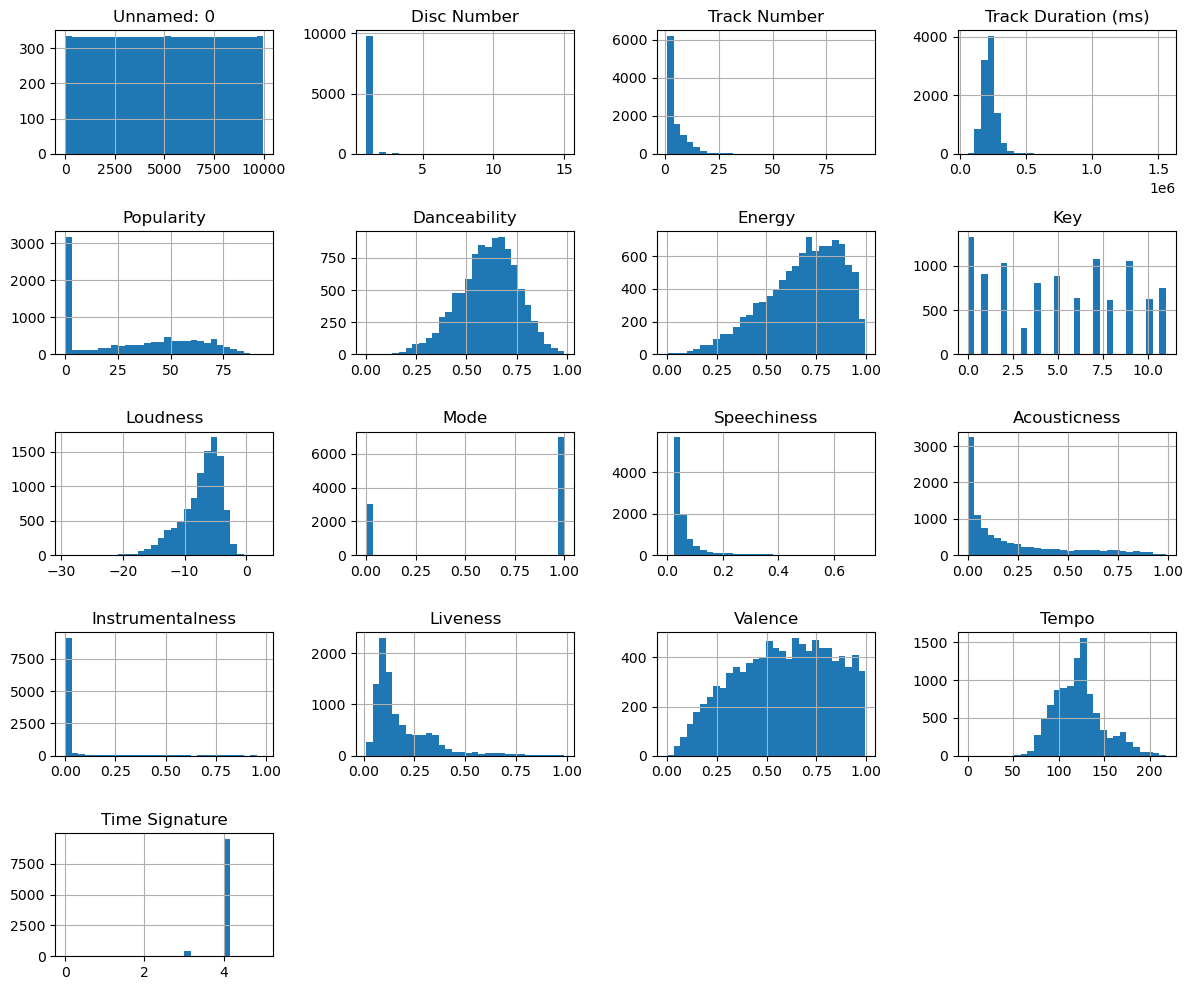

In [117]:
# Plot histograms for each feature
df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

> Most songs are in the 1st disc according to `Disc Number`, which makes sense because most albums have only 1 disc, only few are multi-disc albums

> Most songs are the 1st song of their belonging album, and most albums have less than 25 songs according to `Track Number`

> Most songs are between 200,000 ms and 300,000 ms, which are between 200s and 300s, or between 3.5min and 5min according to `Track Duration (ms)`

> Most songs have popular score close to 0, which means most songs in this dataset are not popular according to `Popularity`

> According to left-skewed distributions of `Danceability`, `Energy`, `Loudness`, `Valence`, `Tempo`, most songs are exciting and positive

> According to right-skewed distributions of `Speechiness`, `Acousticness`, `Instrumentalness`, `Liveness`, most songs are vocal (less rap, less pure music) and studio recordings (not live music)

> According to `Key` (evenly distributed), `Mode` (most 1), `Time Signature` (most 4/4), most songs have a wide variety of major-keys and are modern pop music

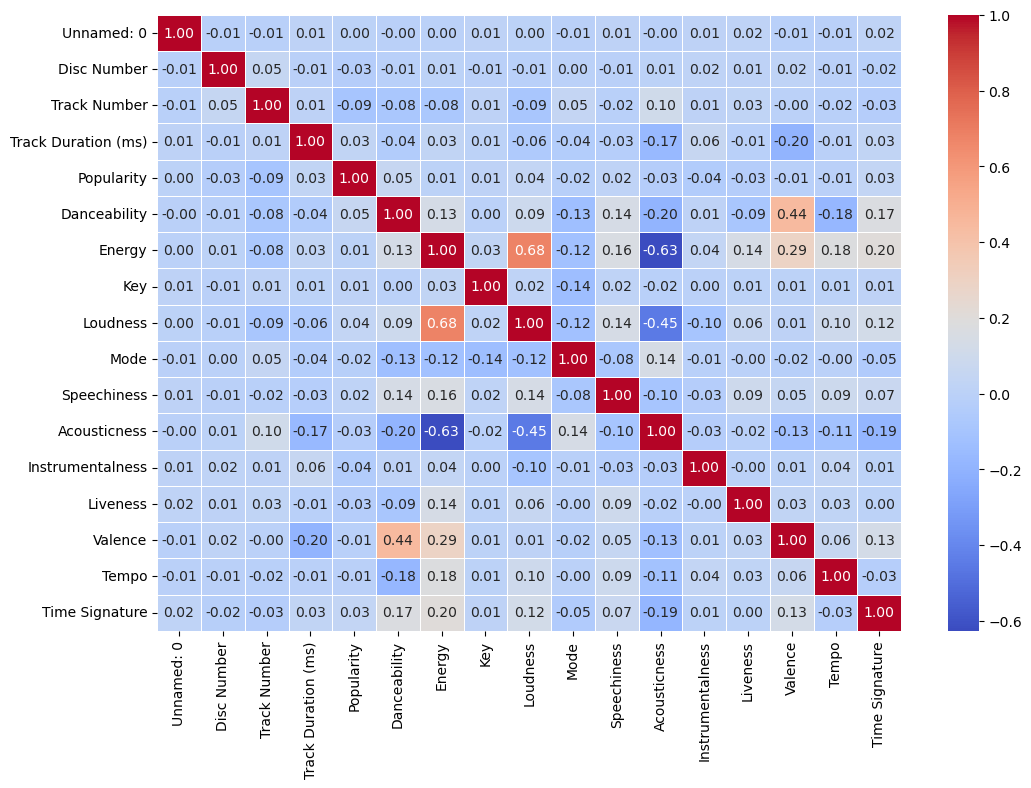

In [119]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

> `Valence` and `Danceability`, `Loudness` and `Energy` have highly positive correlation, which makes sense

> `Acousticness` and `Energy`, `Acousticness` and `Loudness` have highly negative correlation, which also makes sense

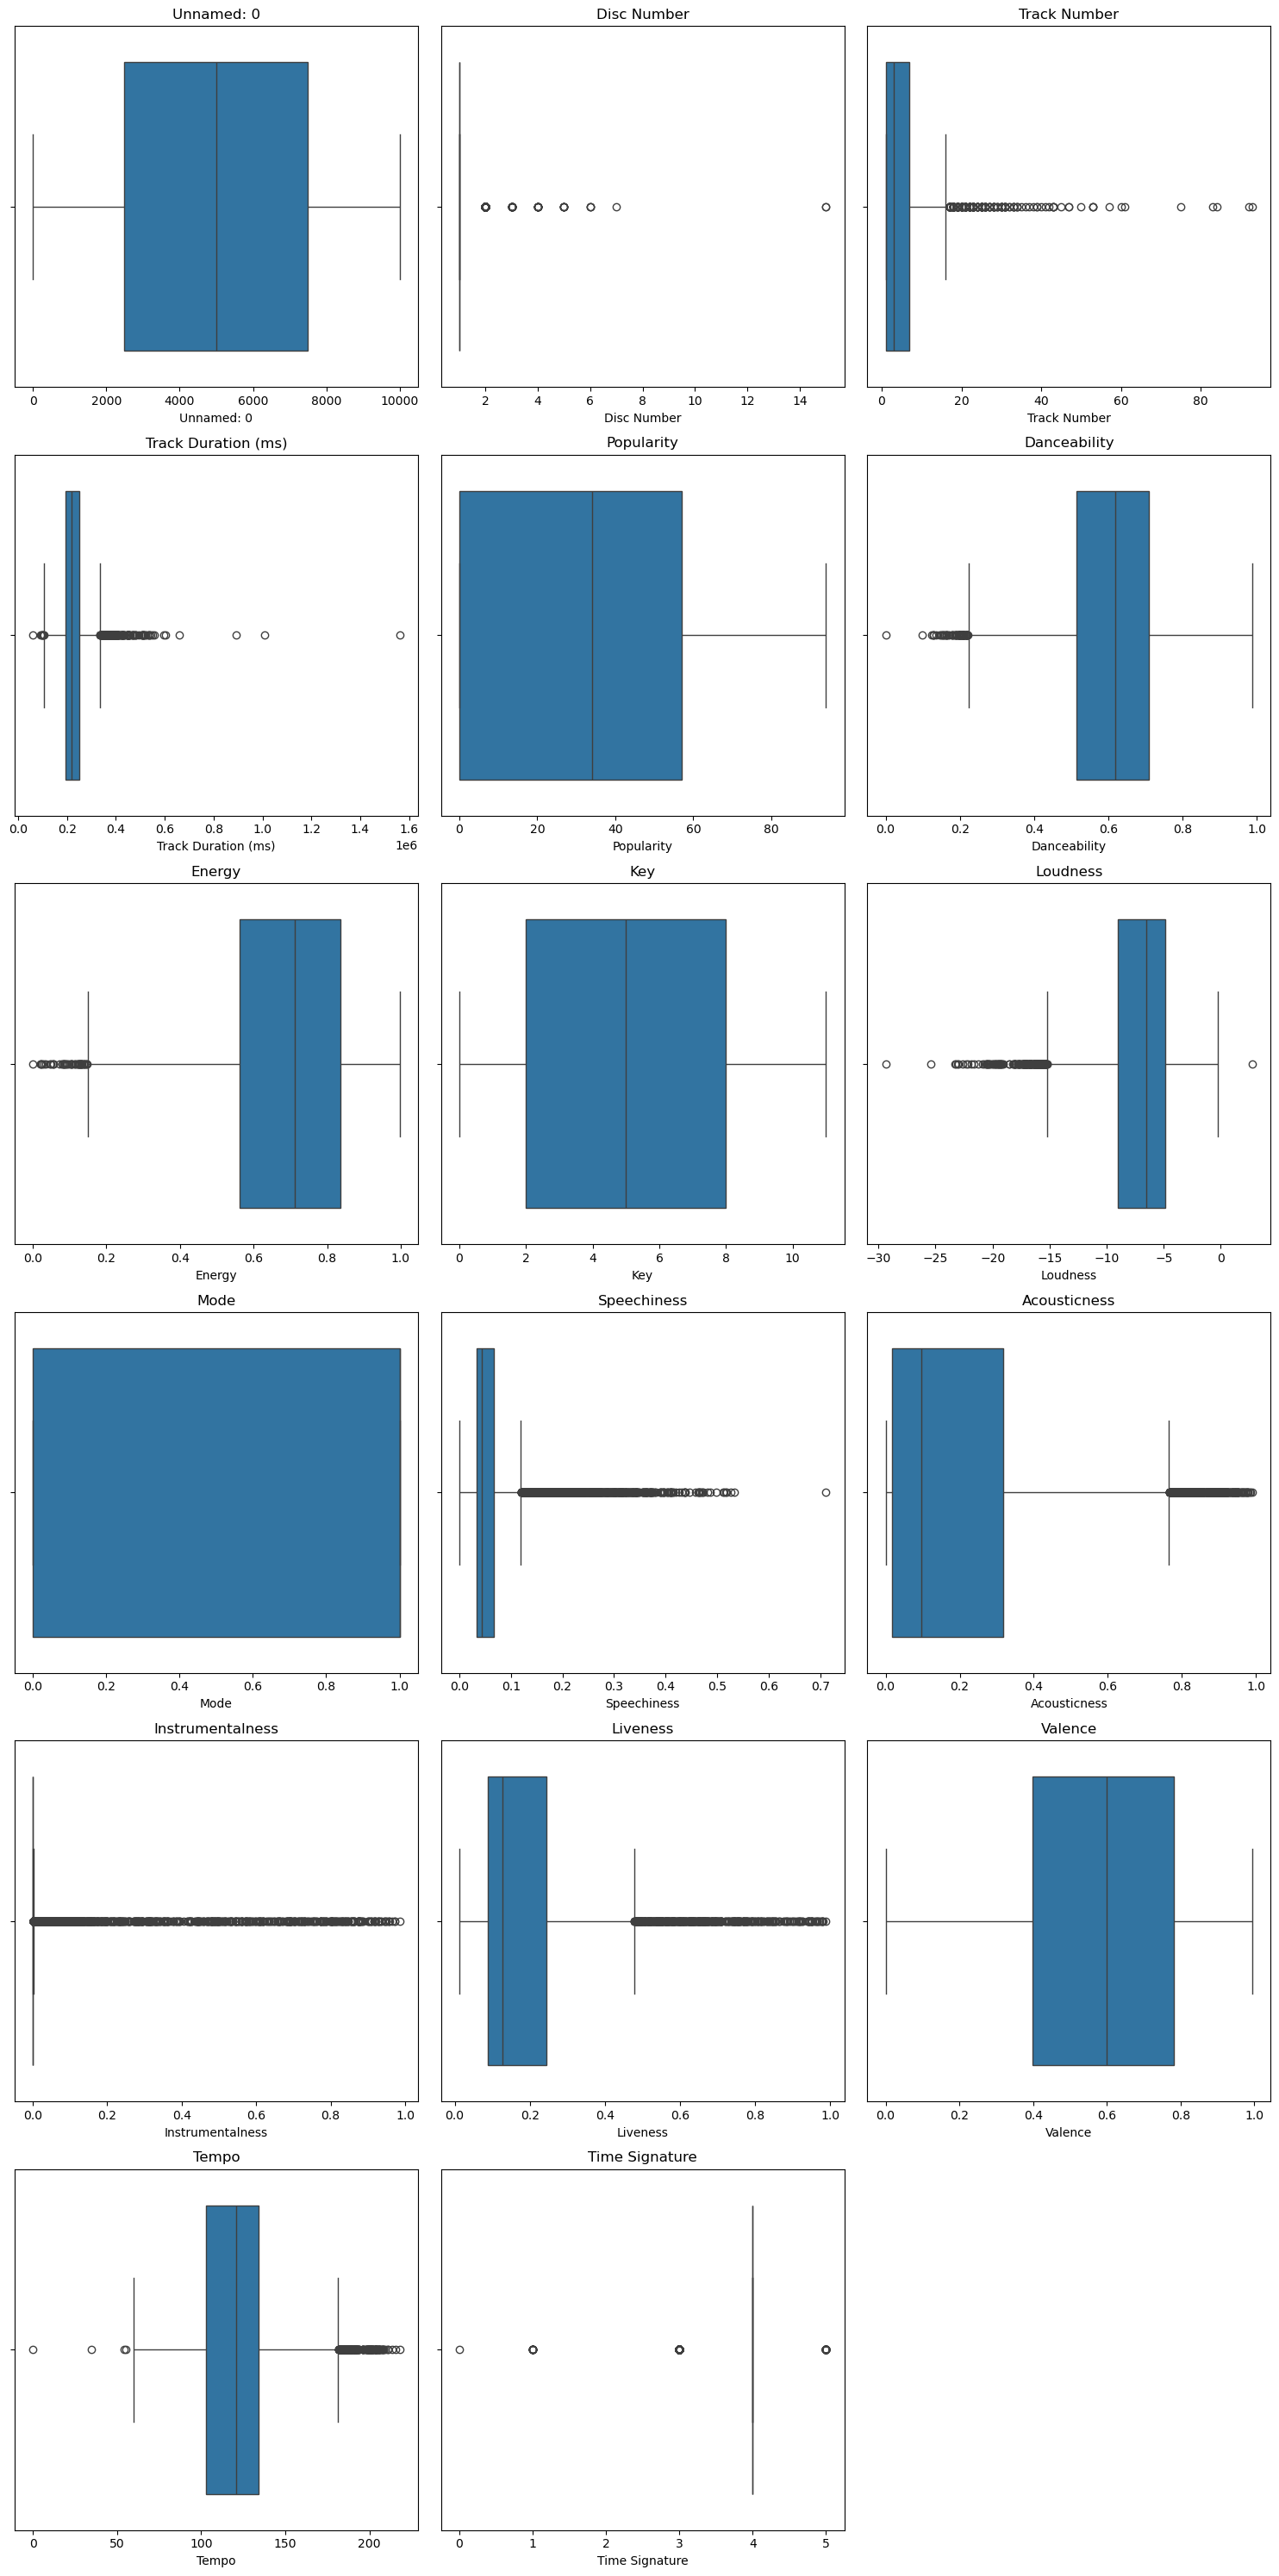

In [157]:
# Plot boxplots for each feature
import math
n_cols = numeric_df.shape[1]
n_rows = math.ceil(n_cols / 3)

plt.figure(figsize=(15, n_rows * 5))
for i, col in enumerate(numeric_df.columns):
    plt.subplot(n_rows, 3, i + 1)
    sns.boxplot(x=numeric_df[col])
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

> The maximum disc in an album is around 15 according to `Disc Number`

> The maximum songs in an album is around 90 according to `Track Number`

> The maximum length of a song is around 1,600,000ms (= 1,600 seconds = 26 minutes = close to half an hour) according to `Track Duration (ms)`

> There are also extremely popular songs and extremely unpopular songs according to `Popularity`

> `Loudness`, `Acousticness`, `Speechiness`, `Instrumentalness`, and `Liveness` have lots of outliers

> `Danceability`, `Energy` have less outliers, and `Valence` don't have outliers

> `Tempo` also has a good number of extreme values, possibly very slow or very fast tracks
    
> `Popularity`, `Mode`, and `Key` do not have outliers, which makes sense as they have predefined ranges

> `Time Signature` have many outliers because most modern music only have 1 time signature of 4/4

In [163]:
# Identify outliers using the IQR method
outlier_info = {}
for col in numeric_df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_info[col] = len(outliers)

# Display outlier counts per feature
outlier_info

{'Unnamed: 0': 0,
 'Disc Number': 226,
 'Track Number': 321,
 'Track Duration (ms)': 284,
 'Popularity': 0,
 'Danceability': 71,
 'Energy': 50,
 'Key': 0,
 'Loudness': 228,
 'Mode': 0,
 'Speechiness': 1043,
 'Acousticness': 484,
 'Instrumentalness': 2056,
 'Liveness': 489,
 'Valence': 0,
 'Tempo': 237,
 'Time Signature': 472}

> We don't drop these outliers since they could be genuine observations (not wrong information but could be important information)
> e.g.: The longest song with 26 min duration is called "Tubular Bells - Pt. I" (see below), which is a truth according to the link: https://www.youtube.com/watch?v=BfWJqKIxyGc

In [268]:
df.loc[df['Track Duration (ms)'].idxmax()]

Unnamed: 0                                                           4185
Track URI                            spotify:track:7ERSQrRptZVM7q3VOdM7OL
Track Name                                          Tubular Bells - Pt. I
Artist URI(s)                       spotify:artist:562Od3CffWedyz2BbeYWVn
Artist Name(s)                                              Mike Oldfield
Album URI                            spotify:album:0a3YQpBnRzJzNktOjb6Dum
Album Name                                                  Tubular Bells
Album Artist URI(s)                 spotify:artist:562Od3CffWedyz2BbeYWVn
Album Artist Name(s)                                        Mike Oldfield
Album Release Date                                             1973-02-01
Album Image URL         https://i.scdn.co/image/ab67616d0000b273631093...
Disc Number                                                             1
Track Number                                                            1
Track Duration (ms)                   

## Problem Statement 1: Cluster songs into different categories based on song characteristics
#### (`Danceability`, `Energy`, `Loudness`, `Speechiness`, `Acousticness`, `Instrumentalness`, `Liveness`, `Valence`, `Tempo`)

### (1) K-Means Clustering
#### Since K-Means requires numerical input, we should use Spotify's audio features

In [173]:
# Select relevant features
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 
            'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

In [175]:
# Drop rows with missing values in selected features
df_cluster = df[features].dropna()

In [177]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Danceability      9993 non-null   float64
 1   Energy            9993 non-null   float64
 2   Loudness          9993 non-null   float64
 3   Speechiness       9993 non-null   float64
 4   Acousticness      9993 non-null   float64
 5   Instrumentalness  9993 non-null   float64
 6   Liveness          9993 non-null   float64
 7   Valence           9993 non-null   float64
 8   Tempo             9993 non-null   float64
dtypes: float64(9)
memory usage: 702.8 KB


In [179]:
df_cluster

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0.532,0.760,-7.123,0.0353,0.000101,0.690000,0.0752,0.158,134.974
1,0.703,0.478,-8.062,0.0441,0.626000,0.000000,0.1130,0.734,117.562
2,0.664,0.714,-6.645,0.1110,0.035300,0.000008,0.0843,0.710,101.969
3,0.543,0.808,-6.615,0.0632,0.042900,0.000002,0.3260,0.299,140.064
4,0.664,0.585,-7.062,0.0248,0.624000,0.000112,0.3430,0.597,111.290
...,...,...,...,...,...,...,...,...,...
9988,0.819,0.650,-10.829,0.0395,0.000814,0.012700,0.4700,0.794,112.307
9989,0.529,0.722,-5.931,0.0418,0.004150,0.001550,0.2070,0.470,97.006
9990,0.602,0.896,-7.702,0.0406,0.017400,0.231000,0.3440,0.457,120.016
9991,0.580,0.504,-12.164,0.0810,0.297000,0.000000,0.0871,0.865,166.826


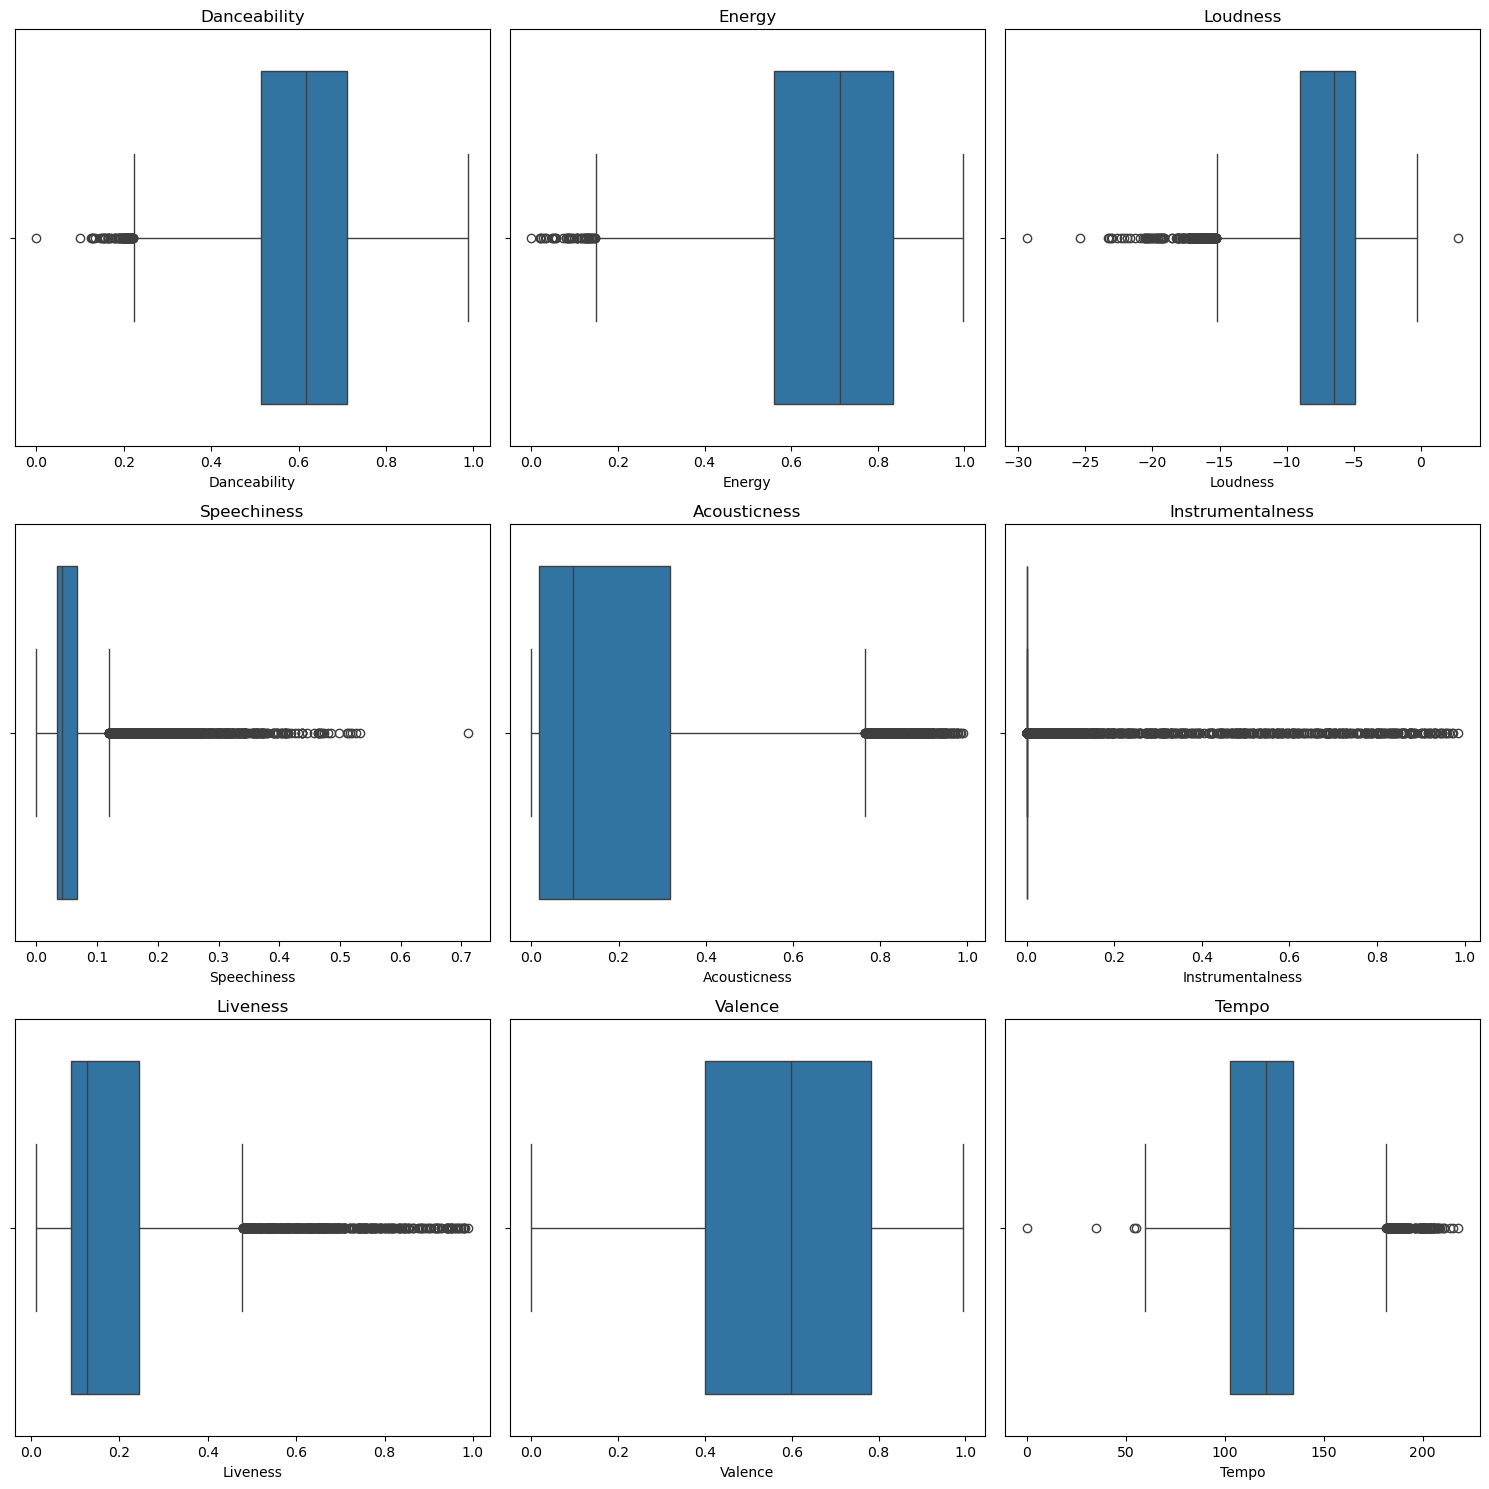

In [223]:
# Plot boxplots for each feature
import math
n_cols = df_cluster.shape[1]
n_rows = math.ceil(n_cols / 3)

plt.figure(figsize=(15, n_rows * 5))
for i, col in enumerate(df_cluster.columns):
    plt.subplot(n_rows, 3, i + 1)
    sns.boxplot(x=df_cluster[col])
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

### Feature Engineering
#### K-Means is sensitive to scale differences, we should standardize numerical features

In [225]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

In [227]:
X_scaled

array([[-0.52380154,  0.39758633,  0.03939864, ..., -0.74219372,
        -1.7925811 ,  0.51251408],
       [ 0.64974787, -1.0780586 , -0.24703221, ..., -0.48726163,
         0.61838651, -0.15127554],
       [ 0.38209625,  0.15687829,  0.1852069 , ..., -0.68082118,
         0.51792953, -0.74572028],
       ...,
       [-0.0434012 ,  1.10924488, -0.13721846, ...,  1.07065666,
        -0.54105451, -0.05772284],
       [-0.19438416, -0.94200623, -1.49829884, ..., -0.66193732,
         1.16671422,  1.72679316],
       [-0.02967547, -0.46059015, -0.84460201, ..., -0.85684571,
        -1.04333943,  0.22956861]])

### Begin Modeling

In [235]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

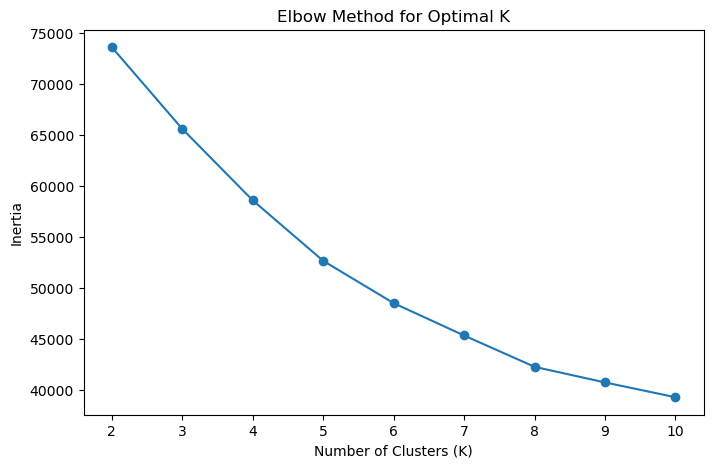

In [237]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

> From the plot, there isn’t a perfectly clear “knee” (a sudden, sharp bend), but the largest drop in inertia occurs when going from K=3 to K=4 (we can see a significant decrease in inertia there). After K=4, the incremental decrease in inertia starts to diminish more gradually

> So, by the traditional “Elbow Method,” K=4 is typically viewed as the most likely "elbow" point in this chart

In [277]:
# Apply K-Means with K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

In [279]:
# Perform PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [281]:
# Add PCA components to the dataframe
df_cluster['PCA1'] = X_pca[:, 0]
df_cluster['PCA2'] = X_pca[:, 1]

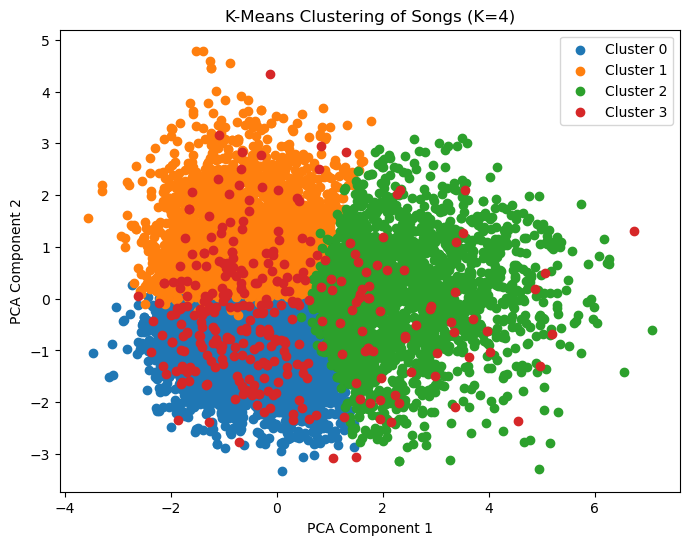

In [283]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(4):
    subset = df_cluster[df_cluster['Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Songs (K=4)')
plt.legend()
plt.show()

In [285]:
# Map clusters back to song names and artists
df_clustered_1 = df[['Track Name', 'Artist Name(s)']].join(df_cluster)

In [287]:
# Display the clustered dataset
df_clustered_1

,Track Name,Artist Name(s),Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Cluster,PCA1,PCA2
0,Fader,The Temper Trap,0.532,0.760,-7.123,0.0353,0.000101,0.690000,0.0752,0.158,134.974,3,0.026409,1.297997
1,Sherry,Frankie Valli & The Four Seasons,0.703,0.478,-8.062,0.0441,0.626000,0.000000,0.1130,0.734,117.562,2,1.394513,-1.235354
2,I Took A Pill In Ibiza - Seeb Remix,"Mike Posner, Seeb",0.664,0.714,-6.645,0.1110,0.035300,0.000008,0.0843,0.710,101.969,0,-0.724079,-0.830902
3,Let Go for Tonight,Foxes,0.543,0.808,-6.615,0.0632,0.042900,0.000002,0.3260,0.299,140.064,1,-0.567019,1.591407
4,The Way I Want To Touch You,Captain & Tennille,0.664,0.585,-7.062,0.0248,0.624000,0.000112,0.3430,0.597,111.290,2,1.084800,-0.356097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,Da Ya Think I'm Sexy?,"N-Trance, Rod Stewart",0.819,0.650,-10.829,0.0395,0.000814,0.012700,0.4700,0.794,112.307,0,-0.371959,-1.391234
9989,Sugar,"Peking Duk, Jack River",0.529,0.722,-5.931,0.0418,0.004150,0.001550,0.2070,0.470,97.006,1,-0.273701,0.531556
9990,Jackson’s Last Stand - Radio Edit,Ou Est Le Swimming Pool,0.602,0.896,-7.702,0.0406,0.017400,0.231000,0.3440,0.457,120.016,1,-0.807029,0.636861
9991,Sick N Tired,Billy Thorpe & The Aztecs,0.580,0.504,-12.164,0.0810,0.297000,0.000000,0.0871,0.865,166.826,2,0.956902,-0.541942


#### Show number of tracks in each cluster

In [335]:
# Compute cluster size distribution
cluster_counts = df_clustered_1['Cluster'].value_counts()

# Display cluster sizes
cluster_size_df = pd.DataFrame(cluster_counts).rename(columns={'Cluster': 'Cluster Size'})

cluster_size_df

,count
Cluster,
0,4251
1,3256
2,2169
3,317


> Ideally, there should be less songs in each cluster (100~500 songs) since we want more personalized and a wide variety of clusters for users to choose from

> Ideally, all clusters should have similar sizes, and cluster 3 has way less songs than other clusters which could be a problem

#### Compare the mean of each cluster's features to see which group is

In [290]:
# Summarize characteristics of each cluster
cluster_summary= df_cluster[features + ['Cluster']].groupby('Cluster').mean()

# Display characteristics of each cluster
display(cluster_summary)

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
Cluster,,,,,,,,,
0,0.712837,0.735293,-6.757335,0.069154,0.135919,0.008764,0.158945,0.742124,115.691847
1,0.524210,0.784458,-5.464384,0.074919,0.087971,0.008787,0.228762,0.467833,134.544993
2,0.527558,0.426700,-10.720971,0.043495,0.537891,0.009044,0.171187,0.456629,112.805350
3,0.623374,0.725479,-8.516025,0.055559,0.159645,0.658315,0.187247,0.599550,125.840189


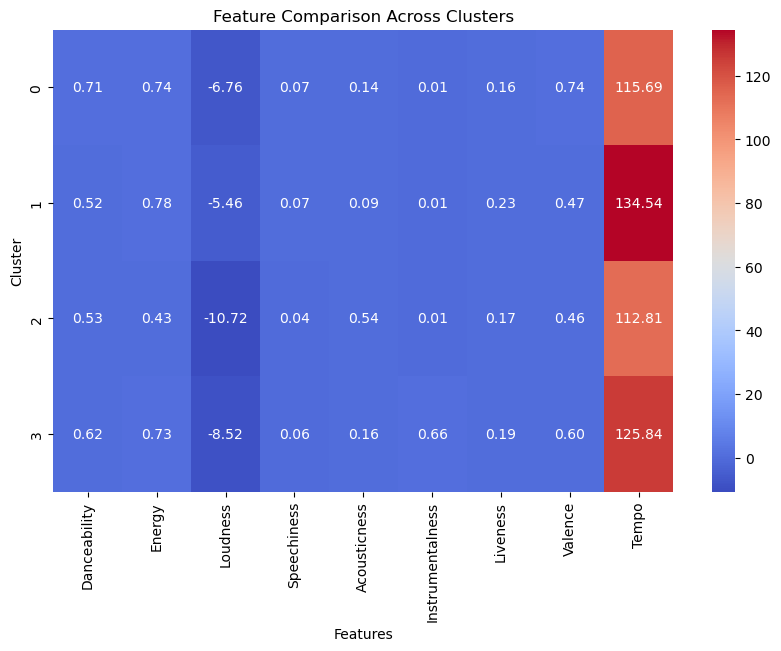

In [327]:
# Set up the figure for a heatmap comparison (just to visualize cluster_summary, not a correlation matrix)
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Comparison Across Clusters")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()

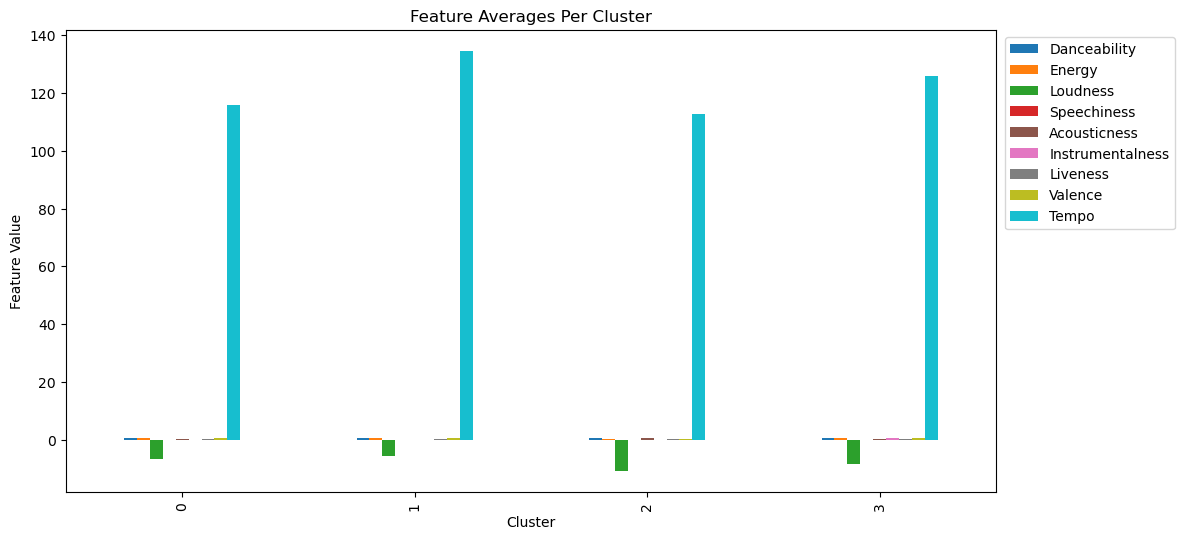

In [329]:
# Bar chart comparing feature averages across clusters
cluster_summary.plot(kind='bar', figsize=(12, 6), colormap="tab10")
plt.title("Feature Averages Per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Feature Value")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()

In [292]:
# Identify key characteristics for each cluster
cluster_analysis_max = cluster_summary.copy()
cluster_analysis_max['Most Danceable'] = cluster_summary['Danceability'].idxmax()
cluster_analysis_max['Most Energetic'] = cluster_summary['Energy'].idxmax()
cluster_analysis_max['Loudest'] = cluster_summary['Loudness'].idxmax()
cluster_analysis_max['Most Speech-like'] = cluster_summary['Speechiness'].idxmax()
cluster_analysis_max['Most Acoustic'] = cluster_summary['Acousticness'].idxmax()
cluster_analysis_max['Most Instrumental'] = cluster_summary['Instrumentalness'].idxmax()
cluster_analysis_max['Most Live'] = cluster_summary['Liveness'].idxmax()
cluster_analysis_max['Happiest (High Valence)'] = cluster_summary['Valence'].idxmax()
cluster_analysis_max['Fastest Tempo'] = cluster_summary['Tempo'].idxmax()

# Drop the first 9 columns by index position
cluster_analysis_max.drop(cluster_analysis_max.columns[:9], axis=1, inplace=True)

# Display the cluster characteristics
display(cluster_analysis_max)

,Most Danceable,Most Energetic,Loudest,Most Speech-like,Most Acoustic,Most Instrumental,Most Live,Happiest (High Valence),Fastest Tempo
Cluster,,,,,,,,,
0,0,1,1,1,2,3,1,0,1
1,0,1,1,1,2,3,1,0,1
2,0,1,1,1,2,3,1,0,1
3,0,1,1,1,2,3,1,0,1


In [294]:
# Identify key characteristics for each cluster
cluster_analysis_min = cluster_summary.copy()
cluster_analysis_min['Least Danceable'] = cluster_summary['Danceability'].idxmin()
cluster_analysis_min['Least Energetic'] = cluster_summary['Energy'].idxmin()
cluster_analysis_min['Quietest'] = cluster_summary['Loudness'].idxmin()
cluster_analysis_min['Least Speech-like'] = cluster_summary['Speechiness'].idxmin()
cluster_analysis_min['Most Electric'] = cluster_summary['Acousticness'].idxmin()
cluster_analysis_min['Most Vocal'] = cluster_summary['Instrumentalness'].idxmin()
cluster_analysis_min['Most Studio'] = cluster_summary['Liveness'].idxmin()
cluster_analysis_min['Saddest (Low Valence)'] = cluster_summary['Valence'].idxmin()
cluster_analysis_min['Slowest Tempo'] = cluster_summary['Tempo'].idxmin()

# Drop the first 9 columns by index position
cluster_analysis_min.drop(cluster_analysis_min.columns[:9], axis=1, inplace=True)

# Display the cluster characteristics
display(cluster_analysis_min)

,Least Danceable,Least Energetic,Quietest,Least Speech-like,Most Electric,Most Vocal,Most Studio,Saddest (Low Valence),Slowest Tempo
Cluster,,,,,,,,,
0,1,2,2,2,1,0,0,2,2
1,1,2,2,2,1,0,0,2,2
2,1,2,2,2,1,0,0,2,2
3,1,2,2,2,1,0,0,2,2


In [302]:
cluster_labels = cluster_summary.copy()

# Dictionary for cluster labels
labels_dict = {
    0: "Danceable & Vocal",
    1: "Energetic & Electric",
    2: "Acoustic & Quiet",
    3: "Instrumental & Pure Music"
}

cluster_labels["Track Characteristics"] = cluster_labels.index.map(labels_dict)

# Drop the first 9 columns by index position
cluster_labels.drop(cluster_labels.columns[:9], axis=1, inplace=True)

# Display the cluster labels
display(cluster_labels)

,Track Characteristics
Cluster,
0,Danceable & Vocal
1,Energetic & Electric
2,Acoustic & Quiet
3,Instrumental & Pure Music


In [375]:
# Map track characteristics to each track
df_kmeans_1 = df_clustered_1.merge(
    cluster_labels,
    on='Cluster',
    how='left'
)

# Add other info from original dataset
df_kmeans_1 = df[['Track URI', 'Album Name', 'Album Release Date', 'Popularity', 'Artist Genres']].join(df_kmeans_1)

# Drop columns without business purposes
df_kmeans_1.drop(columns=df_kmeans_1.loc[:, 'Danceability':'Tempo'].columns, inplace=True)
df_kmeans_1.drop(columns=['PCA1', 'PCA2'], inplace=True)

# Reorder columns
df_kmeans_1 = df_kmeans_1[[
        'Track Name',
        'Track URI',
        'Artist Name(s)',
        'Artist Genres',
        'Album Name',
        'Album Release Date',
        'Popularity',
        'Cluster',
        'Track Characteristics'
]]
    
# Final dataset with track, artist, album, popularity, cluster, characteristics
df_kmeans_1

,Track Name,Track URI,Artist Name(s),Artist Genres,Album Name,Album Release Date,Popularity,Cluster,Track Characteristics
0,Fader,spotify:track:0vNPJrUrBnMFdCs8b2MTNG,The Temper Trap,"indietronica,modern rock,shimmer pop",Conditions (Tour Edition),2009,0,3,Instrumental & Pure Music
1,Sherry,spotify:track:0NpvdCO506uO58D4AbKzki,Frankie Valli & The Four Seasons,"adult standards,bubblegum pop,doo-wop,lounge,n...",The Very Best of Frankie Valli & The 4 Seasons,2003-01-14,54,2,Acoustic & Quiet
2,I Took A Pill In Ibiza - Seeb Remix,spotify:track:1MtUq6Wp1eQ8PC6BbPCj8P,"Mike Posner, Seeb","dance pop,pop,pop dance,pop rap,pop dance","At Night, Alone.",2016-05-06,63,0,Danceable & Vocal
3,Let Go for Tonight,spotify:track:59lq75uFIqzUZcgZ4CbqFG,Foxes,"electropop,metropopolis,uk pop",Glorious (Deluxe),2014-05-12,39,1,Energetic & Electric
4,The Way I Want To Touch You,spotify:track:7KdcZQ3GJeGdserhK61kfv,Captain & Tennille,"mellow gold,soft rock,yacht rock",Love Will Keep Us Together,1975-01-01,35,2,Acoustic & Quiet
...,...,...,...,...,...,...,...,...,...
9988,Da Ya Think I'm Sexy?,spotify:track:0gTFo2Va6oImBxUZOEOg9T,"N-Trance, Rod Stewart","eurodance,hip house,mellow gold,soft rock",Da Ya Think I'm Sexy?,1997-10-27,0,0,Danceable & Vocal
9989,Sugar,spotify:track:1GLM0M9DA62xZsyp2UNq7i,"Peking Duk, Jack River","aussietronica,australian electropop,australian...",Sugar,2019-01-17,41,1,Energetic & Electric
9990,Jackson’s Last Stand - Radio Edit,spotify:track:1AMEicdMJudkwm5IgNTx9R,Ou Est Le Swimming Pool,"australian dance,neo-synthpop",Jackson’s Last Stand,2010-01-01,20,1,Energetic & Electric
9991,Sick N Tired,spotify:track:5ubGyprsZq8GQriurAF1dW,Billy Thorpe & The Aztecs,australian rock,The Very Best Of,2007-02-06,17,2,Acoustic & Quiet


> I did some research to see if the track characteristics correctly match with the song, and interestingly, the first song "Fader" is an instrumental music with slight lyrics. Because of that, Spotify couldn't load the lyrics for "Fader" when users listen to the song. Therefore, "Fader" might fit into clustering "Instrumental & Pure Music", validating that our clustering result is accuracy

In [377]:
# df_kmeans_1.to_csv('C:/Users/97610/Downloads/kmeans_4_clusters.csv')

### Model Evaluation

In [343]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate Inertia (Within-Cluster Sum of Squares - WCSS)
inertia = kmeans.inertia_

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df_kmeans_1['Cluster'])

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, df_kmeans_1['Cluster'])

# Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_scaled, df_kmeans_1['Cluster'])

# Display evaluation metrics
evaluation_results = pd.DataFrame({
    "Metric": ["Inertia", "Silhouette Score", "Davies-Bouldin Index", "Calinski-Harabasz Index"],
    "Value": [inertia, silhouette_avg, davies_bouldin, calinski_harabasz]
})

# Show evaluation results
evaluation_results

,Metric,Value
0,Inertia,58600.321228
1,Silhouette Score,0.165649
2,Davies-Bouldin Index,1.697148
3,Calinski-Harabasz Index,1780.548727


#### Here are model evaluation metrics for K-Means clustering when K=4:

- Inertia (WCSS): Measures how compact the clusters are (Lower values indicate better clustering but should be used with the Elbow Method)
> When K=4, Inertia is 58600

- Silhouette Score: Measures cluster separation (Range from -1 to 1, values closer to 1 indicate well-separated, dense clusters)
> When K=4, Silhouette Score is 0.166

- Davies-Bouldin Index: Measures similarity between clusters (Lower values indicate more compact and well-separated clusters)
> When K=4, Davies-Bouldin Index is 1.697

- Calinski-Harabasz Index: Checks if some clusters dominate the dataset (A high score means the clustering is structured and meaningful)
> When K=4, Calinski-Harabasz Index is 1781

### Hyperparameter Tuning (Change K)

In [360]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

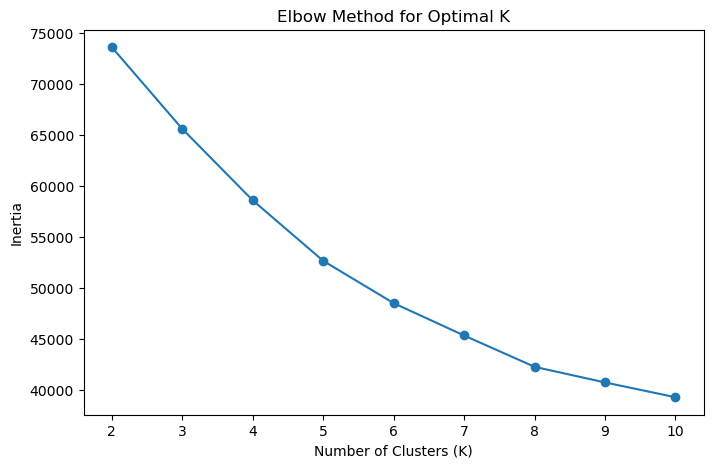

In [362]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

#### Since choosing K is a subjective task, especially in this elbow method plot, it is quite difficult to determine where exactly the elbow point is. Therefore, let's try K=5 this time

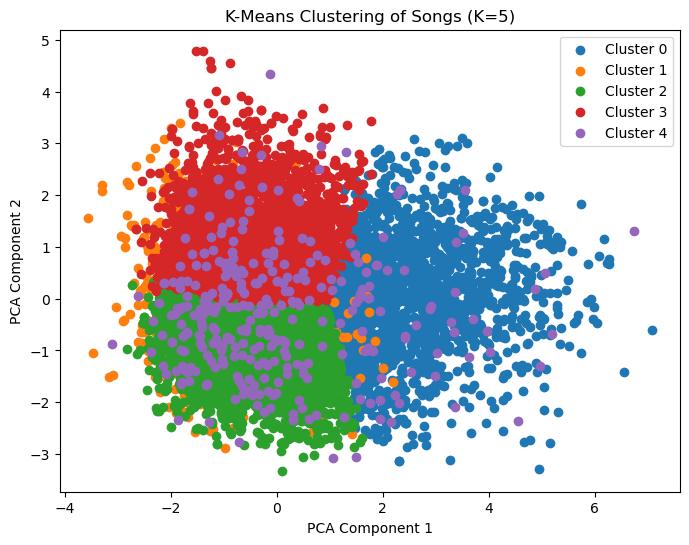

In [388]:
# Apply K-Means with K=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# Perform PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the dataframe
df_cluster['PCA1'] = X_pca[:, 0]
df_cluster['PCA2'] = X_pca[:, 1]

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(5): # this will iterate through 0 to 4
    subset = df_cluster[df_cluster['Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Songs (K=5)')
plt.legend()
plt.show()

In [390]:
df_cluster

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Cluster,PCA1,PCA2
0,0.532,0.760,-7.123,0.0353,0.000101,0.690000,0.0752,0.158,134.974,4,0.026409,1.297997
1,0.703,0.478,-8.062,0.0441,0.626000,0.000000,0.1130,0.734,117.562,0,1.394513,-1.235354
2,0.664,0.714,-6.645,0.1110,0.035300,0.000008,0.0843,0.710,101.969,2,-0.724079,-0.830902
3,0.543,0.808,-6.615,0.0632,0.042900,0.000002,0.3260,0.299,140.064,3,-0.567019,1.591407
4,0.664,0.585,-7.062,0.0248,0.624000,0.000112,0.3430,0.597,111.290,0,1.084800,-0.356097
...,...,...,...,...,...,...,...,...,...,...,...,...
9988,0.819,0.650,-10.829,0.0395,0.000814,0.012700,0.4700,0.794,112.307,2,-0.371959,-1.391234
9989,0.529,0.722,-5.931,0.0418,0.004150,0.001550,0.2070,0.470,97.006,3,-0.273701,0.531556
9990,0.602,0.896,-7.702,0.0406,0.017400,0.231000,0.3440,0.457,120.016,3,-0.807029,0.636861
9991,0.580,0.504,-12.164,0.0810,0.297000,0.000000,0.0871,0.865,166.826,2,0.956902,-0.541942


In [392]:
# Map clusters back to song names and artists
df_clustered_2 = df[['Track Name', 'Artist Name(s)']].join(df_cluster)

# Display the clustered dataset
df_clustered_2

,Track Name,Artist Name(s),Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Cluster,PCA1,PCA2
0,Fader,The Temper Trap,0.532,0.760,-7.123,0.0353,0.000101,0.690000,0.0752,0.158,134.974,4,0.026409,1.297997
1,Sherry,Frankie Valli & The Four Seasons,0.703,0.478,-8.062,0.0441,0.626000,0.000000,0.1130,0.734,117.562,0,1.394513,-1.235354
2,I Took A Pill In Ibiza - Seeb Remix,"Mike Posner, Seeb",0.664,0.714,-6.645,0.1110,0.035300,0.000008,0.0843,0.710,101.969,2,-0.724079,-0.830902
3,Let Go for Tonight,Foxes,0.543,0.808,-6.615,0.0632,0.042900,0.000002,0.3260,0.299,140.064,3,-0.567019,1.591407
4,The Way I Want To Touch You,Captain & Tennille,0.664,0.585,-7.062,0.0248,0.624000,0.000112,0.3430,0.597,111.290,0,1.084800,-0.356097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,Da Ya Think I'm Sexy?,"N-Trance, Rod Stewart",0.819,0.650,-10.829,0.0395,0.000814,0.012700,0.4700,0.794,112.307,2,-0.371959,-1.391234
9989,Sugar,"Peking Duk, Jack River",0.529,0.722,-5.931,0.0418,0.004150,0.001550,0.2070,0.470,97.006,3,-0.273701,0.531556
9990,Jackson’s Last Stand - Radio Edit,Ou Est Le Swimming Pool,0.602,0.896,-7.702,0.0406,0.017400,0.231000,0.3440,0.457,120.016,3,-0.807029,0.636861
9991,Sick N Tired,Billy Thorpe & The Aztecs,0.580,0.504,-12.164,0.0810,0.297000,0.000000,0.0871,0.865,166.826,2,0.956902,-0.541942


In [394]:
# Compute cluster size distribution
cluster_counts = df_clustered_2['Cluster'].value_counts()

# Display cluster sizes
cluster_size_df = pd.DataFrame(cluster_counts).rename(columns={'Cluster': 'Cluster Size'})

cluster_size_df

,count
Cluster,
2,3934
3,3087
0,2017
1,636
4,319


> The cluster sizes are still not very equally seperated, comparing to K=4

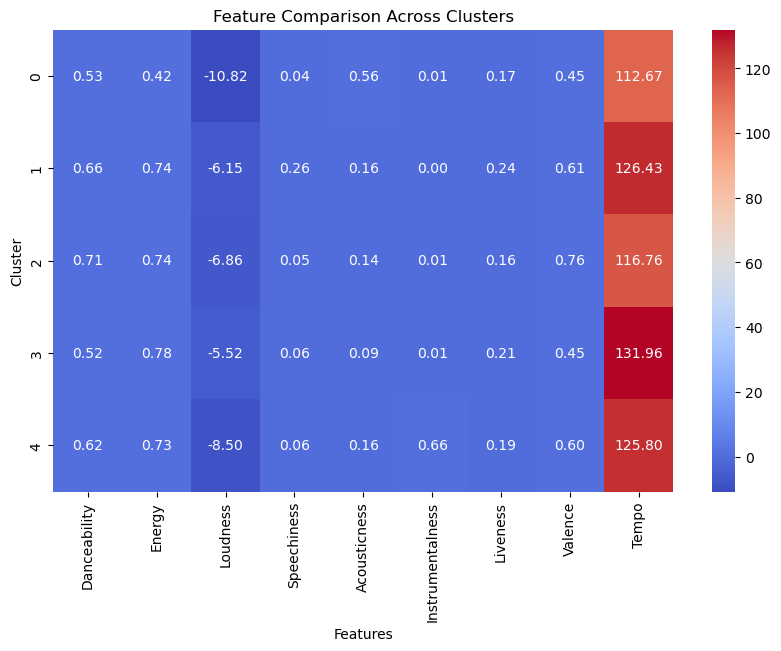

In [402]:
# Summarize characteristics of each cluster
cluster_summary= df_cluster[features + ['Cluster']].groupby('Cluster').mean()

# Display characteristics of each cluster
# cluster_summary

# Set up the figure for a heatmap comparison (just to visualize cluster_summary, not a correlation matrix)
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Comparison Across Clusters")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()

In [398]:
# Identify key characteristics for each cluster
cluster_analysis_max = cluster_summary.copy()
cluster_analysis_max['Most Danceable'] = cluster_summary['Danceability'].idxmax()
cluster_analysis_max['Most Energetic'] = cluster_summary['Energy'].idxmax()
cluster_analysis_max['Loudest'] = cluster_summary['Loudness'].idxmax()
cluster_analysis_max['Most Speech-like'] = cluster_summary['Speechiness'].idxmax()
cluster_analysis_max['Most Acoustic'] = cluster_summary['Acousticness'].idxmax()
cluster_analysis_max['Most Instrumental'] = cluster_summary['Instrumentalness'].idxmax()
cluster_analysis_max['Most Live'] = cluster_summary['Liveness'].idxmax()
cluster_analysis_max['Happiest (High Valence)'] = cluster_summary['Valence'].idxmax()
cluster_analysis_max['Fastest Tempo'] = cluster_summary['Tempo'].idxmax()

# Drop the first 9 columns by index position
cluster_analysis_max.drop(cluster_analysis_max.columns[:9], axis=1, inplace=True)

# Display the cluster characteristics
display(cluster_analysis_max)

,Most Danceable,Most Energetic,Loudest,Most Speech-like,Most Acoustic,Most Instrumental,Most Live,Happiest (High Valence),Fastest Tempo
Cluster,,,,,,,,,
0,2,3,3,1,0,4,1,2,3
1,2,3,3,1,0,4,1,2,3
2,2,3,3,1,0,4,1,2,3
3,2,3,3,1,0,4,1,2,3
4,2,3,3,1,0,4,1,2,3


In [400]:
# Identify key characteristics for each cluster
cluster_analysis_min = cluster_summary.copy()
cluster_analysis_min['Least Danceable'] = cluster_summary['Danceability'].idxmin()
cluster_analysis_min['Least Energetic'] = cluster_summary['Energy'].idxmin()
cluster_analysis_min['Quietest'] = cluster_summary['Loudness'].idxmin()
cluster_analysis_min['Least Speech-like'] = cluster_summary['Speechiness'].idxmin()
cluster_analysis_min['Most Electric'] = cluster_summary['Acousticness'].idxmin()
cluster_analysis_min['Most Vocal'] = cluster_summary['Instrumentalness'].idxmin()
cluster_analysis_min['Most Studio'] = cluster_summary['Liveness'].idxmin()
cluster_analysis_min['Saddest (Low Valence)'] = cluster_summary['Valence'].idxmin()
cluster_analysis_min['Slowest Tempo'] = cluster_summary['Tempo'].idxmin()

# Drop the first 9 columns by index position
cluster_analysis_min.drop(cluster_analysis_min.columns[:9], axis=1, inplace=True)

# Display the cluster characteristics
display(cluster_analysis_min)

,Least Danceable,Least Energetic,Quietest,Least Speech-like,Most Electric,Most Vocal,Most Studio,Saddest (Low Valence),Slowest Tempo
Cluster,,,,,,,,,
0,3,0,0,0,3,1,2,3,0
1,3,0,0,0,3,1,2,3,0
2,3,0,0,0,3,1,2,3,0
3,3,0,0,0,3,1,2,3,0
4,3,0,0,0,3,1,2,3,0


In [404]:
cluster_labels = cluster_summary.copy()

# Dictionary for cluster labels
labels_dict = {
    0: "Acoustic & Quiet",
    1: "Rap & Vocal",
    2: "Danceable & Happy",
    3: "Energetic & Loud",
    4: "Instrumental & Pure Music"
}

cluster_labels["Track Characteristics"] = cluster_labels.index.map(labels_dict)

# Drop the first 9 columns by index position
cluster_labels.drop(cluster_labels.columns[:9], axis=1, inplace=True)

# Display the cluster labels
display(cluster_labels)

,Track Characteristics
Cluster,
0,Acoustic & Quiet
1,Rap & Vocal
2,Danceable & Happy
3,Energetic & Loud
4,Instrumental & Pure Music


In [406]:
# Map track characteristics to each track
df_kmeans_2 = df_clustered_2.merge(
    cluster_labels,
    on='Cluster',
    how='left'
)

# Add other info from original dataset
df_kmeans_2 = df[['Track URI', 'Album Name', 'Album Release Date', 'Popularity', 'Artist Genres']].join(df_kmeans_2)

# Drop columns without business purposes
df_kmeans_2.drop(columns=df_kmeans_2.loc[:, 'Danceability':'Tempo'].columns, inplace=True)
df_kmeans_2.drop(columns=['PCA1', 'PCA2'], inplace=True)

# Reorder columns
df_kmeans_2 = df_kmeans_2[[
        'Track Name',
        'Track URI',
        'Artist Name(s)',
        'Artist Genres',
        'Album Name',
        'Album Release Date',
        'Popularity',
        'Cluster',
        'Track Characteristics'
]]
    
# Final dataset with track, artist, album, popularity, cluster, characteristics
df_kmeans_2

,Track Name,Track URI,Artist Name(s),Artist Genres,Album Name,Album Release Date,Popularity,Cluster,Track Characteristics
0,Fader,spotify:track:0vNPJrUrBnMFdCs8b2MTNG,The Temper Trap,"indietronica,modern rock,shimmer pop",Conditions (Tour Edition),2009,0,4,Instrumental & Pure Music
1,Sherry,spotify:track:0NpvdCO506uO58D4AbKzki,Frankie Valli & The Four Seasons,"adult standards,bubblegum pop,doo-wop,lounge,n...",The Very Best of Frankie Valli & The 4 Seasons,2003-01-14,54,0,Acoustic & Quiet
2,I Took A Pill In Ibiza - Seeb Remix,spotify:track:1MtUq6Wp1eQ8PC6BbPCj8P,"Mike Posner, Seeb","dance pop,pop,pop dance,pop rap,pop dance","At Night, Alone.",2016-05-06,63,2,Danceable & Happy
3,Let Go for Tonight,spotify:track:59lq75uFIqzUZcgZ4CbqFG,Foxes,"electropop,metropopolis,uk pop",Glorious (Deluxe),2014-05-12,39,3,Energetic & Loud
4,The Way I Want To Touch You,spotify:track:7KdcZQ3GJeGdserhK61kfv,Captain & Tennille,"mellow gold,soft rock,yacht rock",Love Will Keep Us Together,1975-01-01,35,0,Acoustic & Quiet
...,...,...,...,...,...,...,...,...,...
9988,Da Ya Think I'm Sexy?,spotify:track:0gTFo2Va6oImBxUZOEOg9T,"N-Trance, Rod Stewart","eurodance,hip house,mellow gold,soft rock",Da Ya Think I'm Sexy?,1997-10-27,0,2,Danceable & Happy
9989,Sugar,spotify:track:1GLM0M9DA62xZsyp2UNq7i,"Peking Duk, Jack River","aussietronica,australian electropop,australian...",Sugar,2019-01-17,41,3,Energetic & Loud
9990,Jackson’s Last Stand - Radio Edit,spotify:track:1AMEicdMJudkwm5IgNTx9R,Ou Est Le Swimming Pool,"australian dance,neo-synthpop",Jackson’s Last Stand,2010-01-01,20,3,Energetic & Loud
9991,Sick N Tired,spotify:track:5ubGyprsZq8GQriurAF1dW,Billy Thorpe & The Aztecs,australian rock,The Very Best Of,2007-02-06,17,2,Danceable & Happy


In [408]:
# df_kmeans_2.to_csv('C:/Users/97610/Downloads/kmeans_5_clusters.csv')

In [410]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate Inertia (Within-Cluster Sum of Squares - WCSS)
inertia = kmeans.inertia_

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df_kmeans_2['Cluster'])

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, df_kmeans_2['Cluster'])

# Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_scaled, df_kmeans_2['Cluster'])

# Display evaluation metrics
evaluation_results = pd.DataFrame({
    "Metric": ["Inertia", "Silhouette Score", "Davies-Bouldin Index", "Calinski-Harabasz Index"],
    "Value": [inertia, silhouette_avg, davies_bouldin, calinski_harabasz]
})

# Show evaluation results
evaluation_results

,Metric,Value
0,Inertia,52665.305130
1,Silhouette Score,0.173036
2,Davies-Bouldin Index,1.536481
3,Calinski-Harabasz Index,1767.151659


#### Here are model evaluation metrics for K-Means clustering when K=5:

- Inertia (WCSS): Measures how compact the clusters are (Lower values indicate better clustering but should be used with the Elbow Method)
> When K=5, Inertia is 52665, lower than K=4, might better clustering

- Silhouette Score: Measures cluster separation (Range from -1 to 1, values closer to 1 indicate well-separated, dense clusters)
> When K=5, Silhouette Score is 0.173, higher than K=4 and closer to 1, might better clustering

- Davies-Bouldin Index: Measures similarity between clusters (Lower values indicate more compact and well-separated clusters)
> When K=5, Davies-Bouldin Index is 1.536, lower than K=4, might better clustering

- Calinski-Harabasz Index: Checks if some clusters dominate the dataset (A high score means the clustering is structured and meaningful)
> When K=5, Calinski-Harabasz Index is 1767, lower than K=4, might worse clustering

#### In summary, K=5 has better clustering than K=4 according to above four metrics 

### Hyperparameter Tuning (Change K)

#### By choosing K=5, we didn't see much improvement on model performance and cluster sizes. Therefore, let's do an extreme value and try K=10 this time

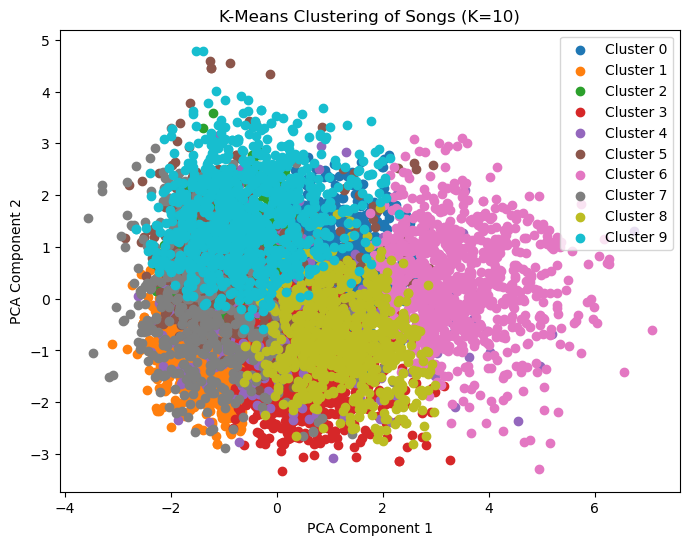

In [416]:
# Apply K-Means with K=10
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# Perform PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the dataframe
df_cluster['PCA1'] = X_pca[:, 0]
df_cluster['PCA2'] = X_pca[:, 1]

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(10):  # this will iterate through clusters 0 to 9
    subset = df_cluster[df_cluster['Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Songs (K=10)')
plt.legend()
plt.show()

In [418]:
df_cluster

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Cluster,PCA1,PCA2
0,0.532,0.760,-7.123,0.0353,0.000101,0.690000,0.0752,0.158,134.974,4,0.026409,1.297997
1,0.703,0.478,-8.062,0.0441,0.626000,0.000000,0.1130,0.734,117.562,8,1.394513,-1.235354
2,0.664,0.714,-6.645,0.1110,0.035300,0.000008,0.0843,0.710,101.969,1,-0.724079,-0.830902
3,0.543,0.808,-6.615,0.0632,0.042900,0.000002,0.3260,0.299,140.064,2,-0.567019,1.591407
4,0.664,0.585,-7.062,0.0248,0.624000,0.000112,0.3430,0.597,111.290,8,1.084800,-0.356097
...,...,...,...,...,...,...,...,...,...,...,...,...
9988,0.819,0.650,-10.829,0.0395,0.000814,0.012700,0.4700,0.794,112.307,3,-0.371959,-1.391234
9989,0.529,0.722,-5.931,0.0418,0.004150,0.001550,0.2070,0.470,97.006,2,-0.273701,0.531556
9990,0.602,0.896,-7.702,0.0406,0.017400,0.231000,0.3440,0.457,120.016,2,-0.807029,0.636861
9991,0.580,0.504,-12.164,0.0810,0.297000,0.000000,0.0871,0.865,166.826,3,0.956902,-0.541942


In [420]:
# Map clusters back to song names and artists
df_clustered_3 = df[['Track Name', 'Artist Name(s)']].join(df_cluster)

# Display the clustered dataset
df_clustered_3

,Track Name,Artist Name(s),Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Cluster,PCA1,PCA2
0,Fader,The Temper Trap,0.532,0.760,-7.123,0.0353,0.000101,0.690000,0.0752,0.158,134.974,4,0.026409,1.297997
1,Sherry,Frankie Valli & The Four Seasons,0.703,0.478,-8.062,0.0441,0.626000,0.000000,0.1130,0.734,117.562,8,1.394513,-1.235354
2,I Took A Pill In Ibiza - Seeb Remix,"Mike Posner, Seeb",0.664,0.714,-6.645,0.1110,0.035300,0.000008,0.0843,0.710,101.969,1,-0.724079,-0.830902
3,Let Go for Tonight,Foxes,0.543,0.808,-6.615,0.0632,0.042900,0.000002,0.3260,0.299,140.064,2,-0.567019,1.591407
4,The Way I Want To Touch You,Captain & Tennille,0.664,0.585,-7.062,0.0248,0.624000,0.000112,0.3430,0.597,111.290,8,1.084800,-0.356097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,Da Ya Think I'm Sexy?,"N-Trance, Rod Stewart",0.819,0.650,-10.829,0.0395,0.000814,0.012700,0.4700,0.794,112.307,3,-0.371959,-1.391234
9989,Sugar,"Peking Duk, Jack River",0.529,0.722,-5.931,0.0418,0.004150,0.001550,0.2070,0.470,97.006,2,-0.273701,0.531556
9990,Jackson’s Last Stand - Radio Edit,Ou Est Le Swimming Pool,0.602,0.896,-7.702,0.0406,0.017400,0.231000,0.3440,0.457,120.016,2,-0.807029,0.636861
9991,Sick N Tired,Billy Thorpe & The Aztecs,0.580,0.504,-12.164,0.0810,0.297000,0.000000,0.0871,0.865,166.826,3,0.956902,-0.541942


In [422]:
# Compute cluster size distribution
cluster_counts = df_clustered_3['Cluster'].value_counts()

# Display cluster sizes
cluster_size_df = pd.DataFrame(cluster_counts).rename(columns={'Cluster': 'Cluster Size'})

cluster_size_df

,count
Cluster,
1,2268
2,1628
0,1202
3,1001
9,970
6,881
8,731
5,507
7,503


> This time the cluster sizes improve a lot and are more equally seperated, comparing to K=4 and K=5

In [428]:
# Summarize characteristics of each cluster
cluster_summary= df_cluster[features + ['Cluster']].groupby('Cluster').mean()

# Display characteristics of each cluster
cluster_summary

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
Cluster,,,,,,,,,
0,0.558474,0.570489,-7.239742,0.041678,0.210905,0.008657,0.141566,0.322563,105.928801
1,0.722659,0.792108,-5.500234,0.057974,0.098700,0.009070,0.150502,0.781259,117.477550
2,0.574124,0.828952,-4.912480,0.056782,0.054669,0.007969,0.179910,0.459890,117.962509
3,0.689281,0.588465,-11.407193,0.047890,0.133065,0.013966,0.136350,0.779187,119.222013
4,0.628680,0.727526,-8.429013,0.055348,0.156488,0.670642,0.178630,0.602319,126.041404
5,0.592556,0.766002,-6.655193,0.065961,0.169001,0.012828,0.621919,0.630580,122.688826
6,0.466835,0.318340,-12.069369,0.038330,0.690527,0.012632,0.155650,0.345599,112.781813
7,0.680799,0.731390,-6.163869,0.277276,0.164060,0.004898,0.211068,0.604624,121.452052
8,0.627475,0.574086,-8.798631,0.049266,0.606435,0.005014,0.184049,0.739921,118.653555


In [430]:
# Identify key characteristics for each cluster
cluster_analysis_max = cluster_summary.copy()
cluster_analysis_max['Most Danceable'] = cluster_summary['Danceability'].idxmax()
cluster_analysis_max['Most Energetic'] = cluster_summary['Energy'].idxmax()
cluster_analysis_max['Loudest'] = cluster_summary['Loudness'].idxmax()
cluster_analysis_max['Most Speech-like'] = cluster_summary['Speechiness'].idxmax()
cluster_analysis_max['Most Acoustic'] = cluster_summary['Acousticness'].idxmax()
cluster_analysis_max['Most Instrumental'] = cluster_summary['Instrumentalness'].idxmax()
cluster_analysis_max['Most Live'] = cluster_summary['Liveness'].idxmax()
cluster_analysis_max['Happiest (High Valence)'] = cluster_summary['Valence'].idxmax()
cluster_analysis_max['Fastest Tempo'] = cluster_summary['Tempo'].idxmax()

# Drop the first 9 columns by index position
cluster_analysis_max.drop(cluster_analysis_max.columns[:9], axis=1, inplace=True)

# Display the cluster characteristics
display(cluster_analysis_max)

,Most Danceable,Most Energetic,Loudest,Most Speech-like,Most Acoustic,Most Instrumental,Most Live,Happiest (High Valence),Fastest Tempo
Cluster,,,,,,,,,
0,1,2,2,7,6,4,5,1,9
1,1,2,2,7,6,4,5,1,9
2,1,2,2,7,6,4,5,1,9
3,1,2,2,7,6,4,5,1,9
4,1,2,2,7,6,4,5,1,9
5,1,2,2,7,6,4,5,1,9
6,1,2,2,7,6,4,5,1,9
7,1,2,2,7,6,4,5,1,9
8,1,2,2,7,6,4,5,1,9


In [432]:
# Identify key characteristics for each cluster
cluster_analysis_min = cluster_summary.copy()
cluster_analysis_min['Least Danceable'] = cluster_summary['Danceability'].idxmin()
cluster_analysis_min['Least Energetic'] = cluster_summary['Energy'].idxmin()
cluster_analysis_min['Quietest'] = cluster_summary['Loudness'].idxmin()
cluster_analysis_min['Least Speech-like'] = cluster_summary['Speechiness'].idxmin()
cluster_analysis_min['Most Electric'] = cluster_summary['Acousticness'].idxmin()
cluster_analysis_min['Most Vocal'] = cluster_summary['Instrumentalness'].idxmin()
cluster_analysis_min['Most Studio'] = cluster_summary['Liveness'].idxmin()
cluster_analysis_min['Saddest (Low Valence)'] = cluster_summary['Valence'].idxmin()
cluster_analysis_min['Slowest Tempo'] = cluster_summary['Tempo'].idxmin()

# Drop the first 9 columns by index position
cluster_analysis_min.drop(cluster_analysis_min.columns[:9], axis=1, inplace=True)

# Display the cluster characteristics
display(cluster_analysis_min)

,Least Danceable,Least Energetic,Quietest,Least Speech-like,Most Electric,Most Vocal,Most Studio,Saddest (Low Valence),Slowest Tempo
Cluster,,,,,,,,,
0,9,6,6,6,2,7,3,0,0
1,9,6,6,6,2,7,3,0,0
2,9,6,6,6,2,7,3,0,0
3,9,6,6,6,2,7,3,0,0
4,9,6,6,6,2,7,3,0,0
5,9,6,6,6,2,7,3,0,0
6,9,6,6,6,2,7,3,0,0
7,9,6,6,6,2,7,3,0,0
8,9,6,6,6,2,7,3,0,0


In [438]:
cluster_labels = cluster_summary.copy()

# Dictionary for cluster labels
labels_dict = {
    0: "Slow & Sad",
    1: "Danceable & Happy",
    2: "Energetic & Loud",
    3: "Studio",
    4: "Instrumental",
    5: "Live",
    6: "Acoustic & Quiet",
    7: "Rap & Vocal",
    8: "Unknown",
    9: "Fast & Unrhythmic"
}

cluster_labels["Track Characteristics"] = cluster_labels.index.map(labels_dict)

# Drop the first 9 columns by index position
cluster_labels.drop(cluster_labels.columns[:9], axis=1, inplace=True)

# Display the cluster labels
display(cluster_labels)

,Track Characteristics
Cluster,
0,Slow & Sad
1,Danceable & Happy
2,Energetic & Loud
3,Studio
4,Instrumental
5,Live
6,Acoustic & Quiet
7,Rap & Vocal
8,Unknown


In [440]:
# Map track characteristics to each track
df_kmeans_3 = df_clustered_3.merge(
    cluster_labels,
    on='Cluster',
    how='left'
)

# Add other info from original dataset
df_kmeans_3 = df[['Track URI', 'Album Name', 'Album Release Date', 'Popularity', 'Artist Genres']].join(df_kmeans_3)

# Drop columns without business purposes
df_kmeans_3.drop(columns=df_kmeans_3.loc[:, 'Danceability':'Tempo'].columns, inplace=True)
df_kmeans_3.drop(columns=['PCA1', 'PCA2'], inplace=True)

# Reorder columns
df_kmeans_3 = df_kmeans_3[[
        'Track Name',
        'Track URI',
        'Artist Name(s)',
        'Artist Genres',
        'Album Name',
        'Album Release Date',
        'Popularity',
        'Cluster',
        'Track Characteristics'
]]
    
# Final dataset with track, artist, album, popularity, cluster, characteristics
df_kmeans_3

,Track Name,Track URI,Artist Name(s),Artist Genres,Album Name,Album Release Date,Popularity,Cluster,Track Characteristics
0,Fader,spotify:track:0vNPJrUrBnMFdCs8b2MTNG,The Temper Trap,"indietronica,modern rock,shimmer pop",Conditions (Tour Edition),2009,0,4,Instrumental
1,Sherry,spotify:track:0NpvdCO506uO58D4AbKzki,Frankie Valli & The Four Seasons,"adult standards,bubblegum pop,doo-wop,lounge,n...",The Very Best of Frankie Valli & The 4 Seasons,2003-01-14,54,8,Unknown
2,I Took A Pill In Ibiza - Seeb Remix,spotify:track:1MtUq6Wp1eQ8PC6BbPCj8P,"Mike Posner, Seeb","dance pop,pop,pop dance,pop rap,pop dance","At Night, Alone.",2016-05-06,63,1,Danceable & Happy
3,Let Go for Tonight,spotify:track:59lq75uFIqzUZcgZ4CbqFG,Foxes,"electropop,metropopolis,uk pop",Glorious (Deluxe),2014-05-12,39,2,Energetic & Loud
4,The Way I Want To Touch You,spotify:track:7KdcZQ3GJeGdserhK61kfv,Captain & Tennille,"mellow gold,soft rock,yacht rock",Love Will Keep Us Together,1975-01-01,35,8,Unknown
...,...,...,...,...,...,...,...,...,...
9988,Da Ya Think I'm Sexy?,spotify:track:0gTFo2Va6oImBxUZOEOg9T,"N-Trance, Rod Stewart","eurodance,hip house,mellow gold,soft rock",Da Ya Think I'm Sexy?,1997-10-27,0,3,Studio
9989,Sugar,spotify:track:1GLM0M9DA62xZsyp2UNq7i,"Peking Duk, Jack River","aussietronica,australian electropop,australian...",Sugar,2019-01-17,41,2,Energetic & Loud
9990,Jackson’s Last Stand - Radio Edit,spotify:track:1AMEicdMJudkwm5IgNTx9R,Ou Est Le Swimming Pool,"australian dance,neo-synthpop",Jackson’s Last Stand,2010-01-01,20,2,Energetic & Loud
9991,Sick N Tired,spotify:track:5ubGyprsZq8GQriurAF1dW,Billy Thorpe & The Aztecs,australian rock,The Very Best Of,2007-02-06,17,3,Studio


In [442]:
# df_kmeans_3.to_csv('C:/Users/97610/Downloads/kmeans_10_clusters.csv')

In [444]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate Inertia (Within-Cluster Sum of Squares - WCSS)
inertia = kmeans.inertia_

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df_kmeans_3['Cluster'])

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, df_kmeans_3['Cluster'])

# Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_scaled, df_kmeans_3['Cluster'])

# Display evaluation metrics
evaluation_results = pd.DataFrame({
    "Metric": ["Inertia", "Silhouette Score", "Davies-Bouldin Index", "Calinski-Harabasz Index"],
    "Value": [inertia, silhouette_avg, davies_bouldin, calinski_harabasz]
})

# Show evaluation results
evaluation_results

,Metric,Value
0,Inertia,39286.027960
1,Silhouette Score,0.146849
2,Davies-Bouldin Index,1.523700
3,Calinski-Harabasz Index,1430.109279


#### Here are model evaluation metrics for K-Means clustering when K=10:

- Inertia (WCSS): Measures how compact the clusters are (Lower values indicate better clustering but should be used with the Elbow Method)
> When K=10, Inertia is 39286, lower than K=5, might better clustering

- Silhouette Score: Measures cluster separation (Range from -1 to 1, values closer to 1 indicate well-separated, dense clusters)
> When K=10, Silhouette Score is 0.147, lower than K=4 and closer to -1, might worse clustering

- Davies-Bouldin Index: Measures similarity between clusters (Lower values indicate more compact and well-separated clusters)
> When K=10, Davies-Bouldin Index is 1.524, lower than K=4, might better clustering

- Calinski-Harabasz Index: Checks if some clusters dominate the dataset (A high score means the clustering is structured and meaningful)
> When K=10, Calinski-Harabasz Index is 1430, lower than K=4, might worse clustering

#### In summary, K=10 has similar clustering performance as K=4 according to above four metrics, but the cluster sizes are more well-seperated than K=4

#### To find the best K, we can also compare several K and their corresponding Silhouette Score

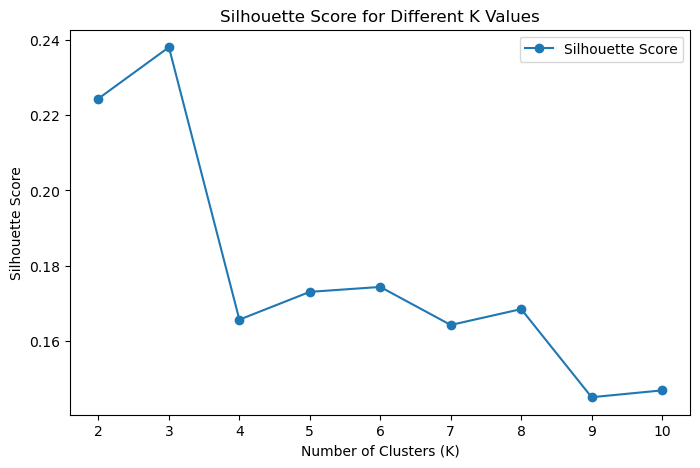

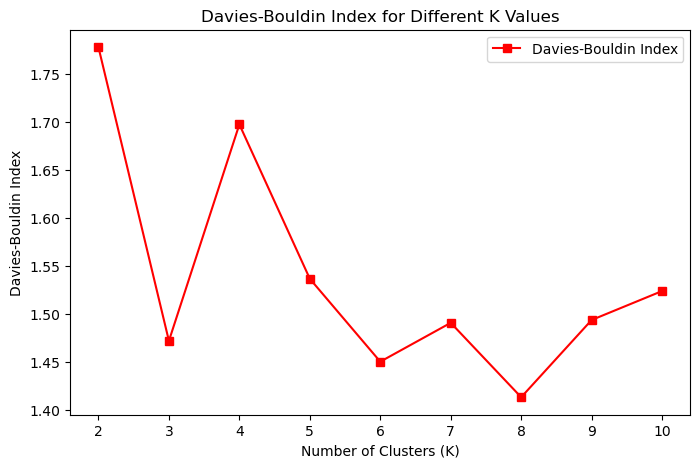

In [448]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Range of K values to test
K_values = range(2, 11)

# Store evaluation metrics for each K
silhouette_scores = []
davies_bouldin_scores = []

for k in K_values:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Compute Silhouette Score
    sil_score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(sil_score)

    # Compute Davies-Bouldin Index
    db_score = davies_bouldin_score(X_scaled, cluster_labels)
    davies_bouldin_scores.append(db_score)

# Plot Silhouette Score vs. K
plt.figure(figsize=(8, 5))
plt.plot(K_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K Values')
plt.legend()
plt.show()

# Plot Davies-Bouldin Index vs. K
plt.figure(figsize=(8, 5))
plt.plot(K_values, davies_bouldin_scores, marker='s', color='red', label='Davies-Bouldin Index')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different K Values')
plt.legend()
plt.show()

> The K with higher value in the 1st plot and the lower value in the 2nd plot could be the optimal K. Since K=4 is completely on the opposite side, we should give up K=4

> It is so interesting to see that K=3 has a record high Silhouette Score and a very low Davies-Bouldin Index. Let's try K=3

### Hyperparameter Tuning (Change K)

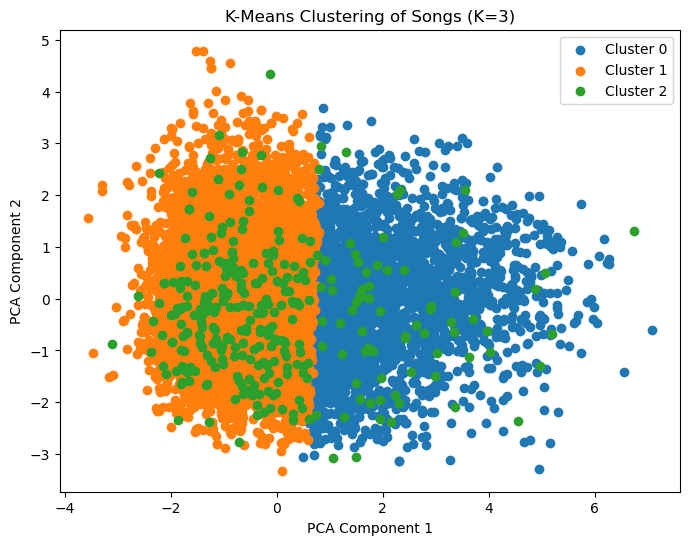

In [452]:
# Apply K-Means with K=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# Perform PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the dataframe
df_cluster['PCA1'] = X_pca[:, 0]
df_cluster['PCA2'] = X_pca[:, 1]

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):  # this will iterate through clusters 0 to 2
    subset = df_cluster[df_cluster['Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Songs (K=3)')
plt.legend()
plt.show()

In [454]:
# Map clusters back to song names and artists
df_clustered_4 = df[['Track Name', 'Artist Name(s)']].join(df_cluster)

# Display the clustered dataset
df_clustered_4

,Track Name,Artist Name(s),Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Cluster,PCA1,PCA2
0,Fader,The Temper Trap,0.532,0.760,-7.123,0.0353,0.000101,0.690000,0.0752,0.158,134.974,2,0.026409,1.297997
1,Sherry,Frankie Valli & The Four Seasons,0.703,0.478,-8.062,0.0441,0.626000,0.000000,0.1130,0.734,117.562,0,1.394513,-1.235354
2,I Took A Pill In Ibiza - Seeb Remix,"Mike Posner, Seeb",0.664,0.714,-6.645,0.1110,0.035300,0.000008,0.0843,0.710,101.969,1,-0.724079,-0.830902
3,Let Go for Tonight,Foxes,0.543,0.808,-6.615,0.0632,0.042900,0.000002,0.3260,0.299,140.064,1,-0.567019,1.591407
4,The Way I Want To Touch You,Captain & Tennille,0.664,0.585,-7.062,0.0248,0.624000,0.000112,0.3430,0.597,111.290,0,1.084800,-0.356097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,Da Ya Think I'm Sexy?,"N-Trance, Rod Stewart",0.819,0.650,-10.829,0.0395,0.000814,0.012700,0.4700,0.794,112.307,1,-0.371959,-1.391234
9989,Sugar,"Peking Duk, Jack River",0.529,0.722,-5.931,0.0418,0.004150,0.001550,0.2070,0.470,97.006,1,-0.273701,0.531556
9990,Jackson’s Last Stand - Radio Edit,Ou Est Le Swimming Pool,0.602,0.896,-7.702,0.0406,0.017400,0.231000,0.3440,0.457,120.016,1,-0.807029,0.636861
9991,Sick N Tired,Billy Thorpe & The Aztecs,0.580,0.504,-12.164,0.0810,0.297000,0.000000,0.0871,0.865,166.826,0,0.956902,-0.541942


In [456]:
# Compute cluster size distribution
cluster_counts = df_clustered_4['Cluster'].value_counts()

# Display cluster sizes
cluster_size_df = pd.DataFrame(cluster_counts).rename(columns={'Cluster': 'Cluster Size'})

cluster_size_df

,count
Cluster,
1,6996
0,2671
2,326


> Very imbalanced clustering sizes

In [458]:
# Summarize characteristics of each cluster
cluster_summary= df_cluster[features + ['Cluster']].groupby('Cluster').mean()

# Display characteristics of each cluster
cluster_summary

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
Cluster,,,,,,,,,
0,0.542311,0.453422,-10.479219,0.045628,0.490249,0.008651,0.166508,0.484710,114.385525
1,0.632798,0.770084,-5.961038,0.072836,0.102950,0.008462,0.192269,0.624256,124.045173
2,0.623977,0.726423,-8.519678,0.056536,0.158982,0.649877,0.188146,0.602967,126.094834


In [462]:
# Identify key characteristics for each cluster
cluster_analysis_max = cluster_summary.copy()
cluster_analysis_max['Most Danceable'] = cluster_summary['Danceability'].idxmax()
cluster_analysis_max['Most Energetic'] = cluster_summary['Energy'].idxmax()
cluster_analysis_max['Loudest'] = cluster_summary['Loudness'].idxmax()
cluster_analysis_max['Most Speech-like'] = cluster_summary['Speechiness'].idxmax()
cluster_analysis_max['Most Acoustic'] = cluster_summary['Acousticness'].idxmax()
cluster_analysis_max['Most Instrumental'] = cluster_summary['Instrumentalness'].idxmax()
cluster_analysis_max['Most Live'] = cluster_summary['Liveness'].idxmax()
cluster_analysis_max['Happiest (High Valence)'] = cluster_summary['Valence'].idxmax()
cluster_analysis_max['Fastest Tempo'] = cluster_summary['Tempo'].idxmax()

# Drop the first 9 columns by index position
cluster_analysis_max.drop(cluster_analysis_max.columns[:9], axis=1, inplace=True)

# Display the cluster characteristics
display(cluster_analysis_max)

,Most Danceable,Most Energetic,Loudest,Most Speech-like,Most Acoustic,Most Instrumental,Most Live,Happiest (High Valence),Fastest Tempo
Cluster,,,,,,,,,
0,1,1,1,1,0,2,1,1,2
1,1,1,1,1,0,2,1,1,2
2,1,1,1,1,0,2,1,1,2


In [464]:
# Identify key characteristics for each cluster
cluster_analysis_min = cluster_summary.copy()
cluster_analysis_min['Least Danceable'] = cluster_summary['Danceability'].idxmin()
cluster_analysis_min['Least Energetic'] = cluster_summary['Energy'].idxmin()
cluster_analysis_min['Quietest'] = cluster_summary['Loudness'].idxmin()
cluster_analysis_min['Least Speech-like'] = cluster_summary['Speechiness'].idxmin()
cluster_analysis_min['Most Electric'] = cluster_summary['Acousticness'].idxmin()
cluster_analysis_min['Most Vocal'] = cluster_summary['Instrumentalness'].idxmin()
cluster_analysis_min['Most Studio'] = cluster_summary['Liveness'].idxmin()
cluster_analysis_min['Saddest (Low Valence)'] = cluster_summary['Valence'].idxmin()
cluster_analysis_min['Slowest Tempo'] = cluster_summary['Tempo'].idxmin()

# Drop the first 9 columns by index position
cluster_analysis_min.drop(cluster_analysis_min.columns[:9], axis=1, inplace=True)

# Display the cluster characteristics
display(cluster_analysis_min)

,Least Danceable,Least Energetic,Quietest,Least Speech-like,Most Electric,Most Vocal,Most Studio,Saddest (Low Valence),Slowest Tempo
Cluster,,,,,,,,,
0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,1,1,0,0,0
2,0,0,0,0,1,1,0,0,0


In [466]:
cluster_labels = cluster_summary.copy()

# Dictionary for cluster labels
labels_dict = {
    0: "Quiet, Sad, Slow, Acoustic",
    1: "Loud, Happy, Energetic, Vocal",
    2: "Fast, Instrumental",
}

cluster_labels["Track Characteristics"] = cluster_labels.index.map(labels_dict)

# Drop the first 9 columns by index position
cluster_labels.drop(cluster_labels.columns[:9], axis=1, inplace=True)

# Display the cluster labels
display(cluster_labels)

,Track Characteristics
Cluster,
0,"Quiet, Sad, Slow, Acoustic"
1,"Loud, Happy, Energetic, Vocal"
2,"Fast, Instrumental"


In [468]:
# Map track characteristics to each track
df_kmeans_4 = df_clustered_4.merge(
    cluster_labels,
    on='Cluster',
    how='left'
)

# Add other info from original dataset
df_kmeans_4 = df[['Track URI', 'Album Name', 'Album Release Date', 'Popularity', 'Artist Genres']].join(df_kmeans_4)

# Drop columns without business purposes
df_kmeans_4.drop(columns=df_kmeans_4.loc[:, 'Danceability':'Tempo'].columns, inplace=True)
df_kmeans_4.drop(columns=['PCA1', 'PCA2'], inplace=True)

# Reorder columns
df_kmeans_4 = df_kmeans_4[[
        'Track Name',
        'Track URI',
        'Artist Name(s)',
        'Artist Genres',
        'Album Name',
        'Album Release Date',
        'Popularity',
        'Cluster',
        'Track Characteristics'
]]
    
# Final dataset with track, artist, album, popularity, cluster, characteristics
df_kmeans_4

,Track Name,Track URI,Artist Name(s),Artist Genres,Album Name,Album Release Date,Popularity,Cluster,Track Characteristics
0,Fader,spotify:track:0vNPJrUrBnMFdCs8b2MTNG,The Temper Trap,"indietronica,modern rock,shimmer pop",Conditions (Tour Edition),2009,0,2,"Fast, Instrumental"
1,Sherry,spotify:track:0NpvdCO506uO58D4AbKzki,Frankie Valli & The Four Seasons,"adult standards,bubblegum pop,doo-wop,lounge,n...",The Very Best of Frankie Valli & The 4 Seasons,2003-01-14,54,0,"Quiet, Sad, Slow, Acoustic"
2,I Took A Pill In Ibiza - Seeb Remix,spotify:track:1MtUq6Wp1eQ8PC6BbPCj8P,"Mike Posner, Seeb","dance pop,pop,pop dance,pop rap,pop dance","At Night, Alone.",2016-05-06,63,1,"Loud, Happy, Energetic, Vocal"
3,Let Go for Tonight,spotify:track:59lq75uFIqzUZcgZ4CbqFG,Foxes,"electropop,metropopolis,uk pop",Glorious (Deluxe),2014-05-12,39,1,"Loud, Happy, Energetic, Vocal"
4,The Way I Want To Touch You,spotify:track:7KdcZQ3GJeGdserhK61kfv,Captain & Tennille,"mellow gold,soft rock,yacht rock",Love Will Keep Us Together,1975-01-01,35,0,"Quiet, Sad, Slow, Acoustic"
...,...,...,...,...,...,...,...,...,...
9988,Da Ya Think I'm Sexy?,spotify:track:0gTFo2Va6oImBxUZOEOg9T,"N-Trance, Rod Stewart","eurodance,hip house,mellow gold,soft rock",Da Ya Think I'm Sexy?,1997-10-27,0,1,"Loud, Happy, Energetic, Vocal"
9989,Sugar,spotify:track:1GLM0M9DA62xZsyp2UNq7i,"Peking Duk, Jack River","aussietronica,australian electropop,australian...",Sugar,2019-01-17,41,1,"Loud, Happy, Energetic, Vocal"
9990,Jackson’s Last Stand - Radio Edit,spotify:track:1AMEicdMJudkwm5IgNTx9R,Ou Est Le Swimming Pool,"australian dance,neo-synthpop",Jackson’s Last Stand,2010-01-01,20,1,"Loud, Happy, Energetic, Vocal"
9991,Sick N Tired,spotify:track:5ubGyprsZq8GQriurAF1dW,Billy Thorpe & The Aztecs,australian rock,The Very Best Of,2007-02-06,17,0,"Quiet, Sad, Slow, Acoustic"


In [470]:
# df_kmeans_4.to_csv('C:/Users/97610/Downloads/kmeans_3_clusters.csv')

In [472]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate Inertia (Within-Cluster Sum of Squares - WCSS)
inertia = kmeans.inertia_

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df_kmeans_4['Cluster'])

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, df_kmeans_4['Cluster'])

# Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_scaled, df_kmeans_4['Cluster'])

# Display evaluation metrics
evaluation_results = pd.DataFrame({
    "Metric": ["Inertia", "Silhouette Score", "Davies-Bouldin Index", "Calinski-Harabasz Index"],
    "Value": [inertia, silhouette_avg, davies_bouldin, calinski_harabasz]
})

# Show evaluation results
evaluation_results

,Metric,Value
0,Inertia,65609.557924
1,Silhouette Score,0.238057
2,Davies-Bouldin Index,1.471834
3,Calinski-Harabasz Index,1852.101691


#### Here are model evaluation metrics for K-Means clustering when K=3:

- Inertia (WCSS): Measures how compact the clusters are (Lower values indicate better clustering but should be used with the Elbow Method)
> When K=3, Inertia is 65609, higher than K=4, might worse clustering

- Silhouette Score: Measures cluster separation (Range from -1 to 1, values closer to 1 indicate well-separated, dense clusters)
> When K=3, Silhouette Score is 0.238, higher than K=4 and closer to 1, might better clustering

- Davies-Bouldin Index: Measures similarity between clusters (Lower values indicate more compact and well-separated clusters)
> When K=3, Davies-Bouldin Index is 1.472, lower than K=4, might better clustering

- Calinski-Harabasz Index: Checks if some clusters dominate the dataset (A high score means the clustering is structured and meaningful)
> When K=3, Calinski-Harabasz Index is 1852, higher than K=4, might better clustering

#### In summary, K=3 has better clustering than K=5 according to above four metrics. Since K=5 is better than K=4, K=3 clustering might have the best performance and result

#### However, since K=3 will cause highly imbalanced cluster sizes, it still might not be a good number to categorize data. Therefore, K=5 could be the optimal K for K-means clustering in this scenario (K=5 also have the lowest inertia among three values)

### Hyperparameter Tuning (Change Initialization Method)

#### We go with K=5 and then change initialization method ("k-means++" vs. "random")

In [487]:
# Compare "k-means++" vs "random" initialization for K=5
init_methods = ["k-means++", "random"]
init_results = {}

for method in init_methods:
    kmeans = KMeans(n_clusters=5, init=method, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Compute evaluation metrics
    sil_score = silhouette_score(X_scaled, cluster_labels)
    db_score = davies_bouldin_score(X_scaled, cluster_labels)
    
    init_results[method] = {"Silhouette Score": sil_score, "Davies-Bouldin Index": db_score}

# Convert results to DataFrame
init_results_df = pd.DataFrame(init_results).T

# Display the results
init_results_df

,Silhouette Score,Davies-Bouldin Index
k-means++,0.173036,1.536481
random,0.172903,1.536396


> Two initialization methods have very similar evaluation scores. "k-means++" has higher Silhouette Score and "random" has lower Davies-Bouldin Index, making it difficult to tell which is better

#### Usually, "k-means++" has smart initialization for faster convergence, which is recommended

### Hyperparameter Tuning (Change Number of Initializations)

In [492]:
# Compare different values of n_init for K=5 using k-means++
n_init_values = [10, 20, 50, 100]
n_init_results = {}

for n in n_init_values:
    kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42, n_init=n)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Compute evaluation metrics
    sil_score = silhouette_score(X_scaled, cluster_labels)
    db_score = davies_bouldin_score(X_scaled, cluster_labels)
    
    n_init_results[n] = {"Silhouette Score": sil_score, "Davies-Bouldin Index": db_score}

# Convert results to DataFrame
n_init_results_df = pd.DataFrame(n_init_results).T

# Display the results
n_init_results_df

,Silhouette Score,Davies-Bouldin Index
10,0.173036,1.536481
20,0.173036,1.536481
50,0.172822,1.536783
100,0.172846,1.537132


#### Since n_init=10 or n_init=20 both have higher Silhouette Score and lower Davies-Bouldin Index, n_init=10 is recommended because of lower computational cost

### Hyperparameter Tuning (Change Maximum Iterations)

In [497]:
# Compare different values of max_iter for K=5 using k-means++
max_iter_values = [100, 300, 500, 1000]
max_iter_results = {}

for max_iter in max_iter_values:
    kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42, n_init=10, max_iter=max_iter)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Compute evaluation metrics
    sil_score = silhouette_score(X_scaled, cluster_labels)
    db_score = davies_bouldin_score(X_scaled, cluster_labels)
    
    max_iter_results[max_iter] = {"Silhouette Score": sil_score, "Davies-Bouldin Index": db_score}

# Convert results to DataFrame
max_iter_results_df = pd.DataFrame(max_iter_results).T

# Display the results
max_iter_results_df

,Silhouette Score,Davies-Bouldin Index
100,0.173036,1.536481
300,0.173036,1.536481
500,0.173036,1.536481
1000,0.173036,1.536481


#### Changing maximum iterations doesn't change any evaluation scores. Therefore, max_iter=100 is recommended because of lower computation time

### Hyperparameter Tuning (Change Random State)

In [507]:
# Compare different values of random_state for K=5 using k-means++
random_states = [0, 42, 100, 200]
random_state_results = {}

for state in random_states:
    kmeans = KMeans(n_clusters=5, init="k-means++", random_state=state, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Compute evaluation metrics
    sil_score = silhouette_score(X_scaled, cluster_labels)
    db_score = davies_bouldin_score(X_scaled, cluster_labels)
    
    random_state_results[state] = {"Silhouette Score": sil_score, "Davies-Bouldin Index": db_score}

# Convert results to DataFrame
random_state_results_df = pd.DataFrame(random_state_results).T

# Display the results
random_state_results_df

,Silhouette Score,Davies-Bouldin Index
0,0.173011,1.536598
42,0.173036,1.536481
100,0.173036,1.536525
200,0.173036,1.536481


#### Since random_state=42 or random_state=200 both have higher Silhouette Score and lower Davies-Bouldin Index, random_state=42 is recommended

### **Final Optimized Hyperparameters for K-Means Clustering**

| **Hyperparameter**  | **Best Value** | **Reason** |
|--------------------|--------------|-----------|
| **K (Number of Clusters)** | `5` | Based on the **Elbow Method** and **Silhouette Score** analysis. |
| **Initialization (`init`)** | `"k-means++"` | Ensures better initial centroid placement, leading to faster and more stable convergence. |
| **Number of Initializations (`n_init`)** | `10` | Reduces randomness impact and improves stability. |
| **Maximum Iterations (`max_iter`)** | `100` | Increasing beyond 100 showed no significant improvement. |
| **Random State (`random_state`)** | `42` | Ensures reproducibility; however, it's **not critical** after setting `n_init=50`. |
| **Evaluation Metrics Used** | Silhouette Score, Davies-Bouldin Index | Confirmed optimal clustering performance. |

### Data Engineering

#### We can duplicate the current dataset and merge back, increasing data from 9993 rows to 19986 rows. After discussing with teammates, we believe 9993 rows are a large dataset and are sufficient for our analysis. Adding repetitive songs also won't improve clustering robustness. Therefore, we will skip this part

### (2) DBSCAN Clustering
#### Since DBSCAN also requires numerical input, we should use Spotify's audio features

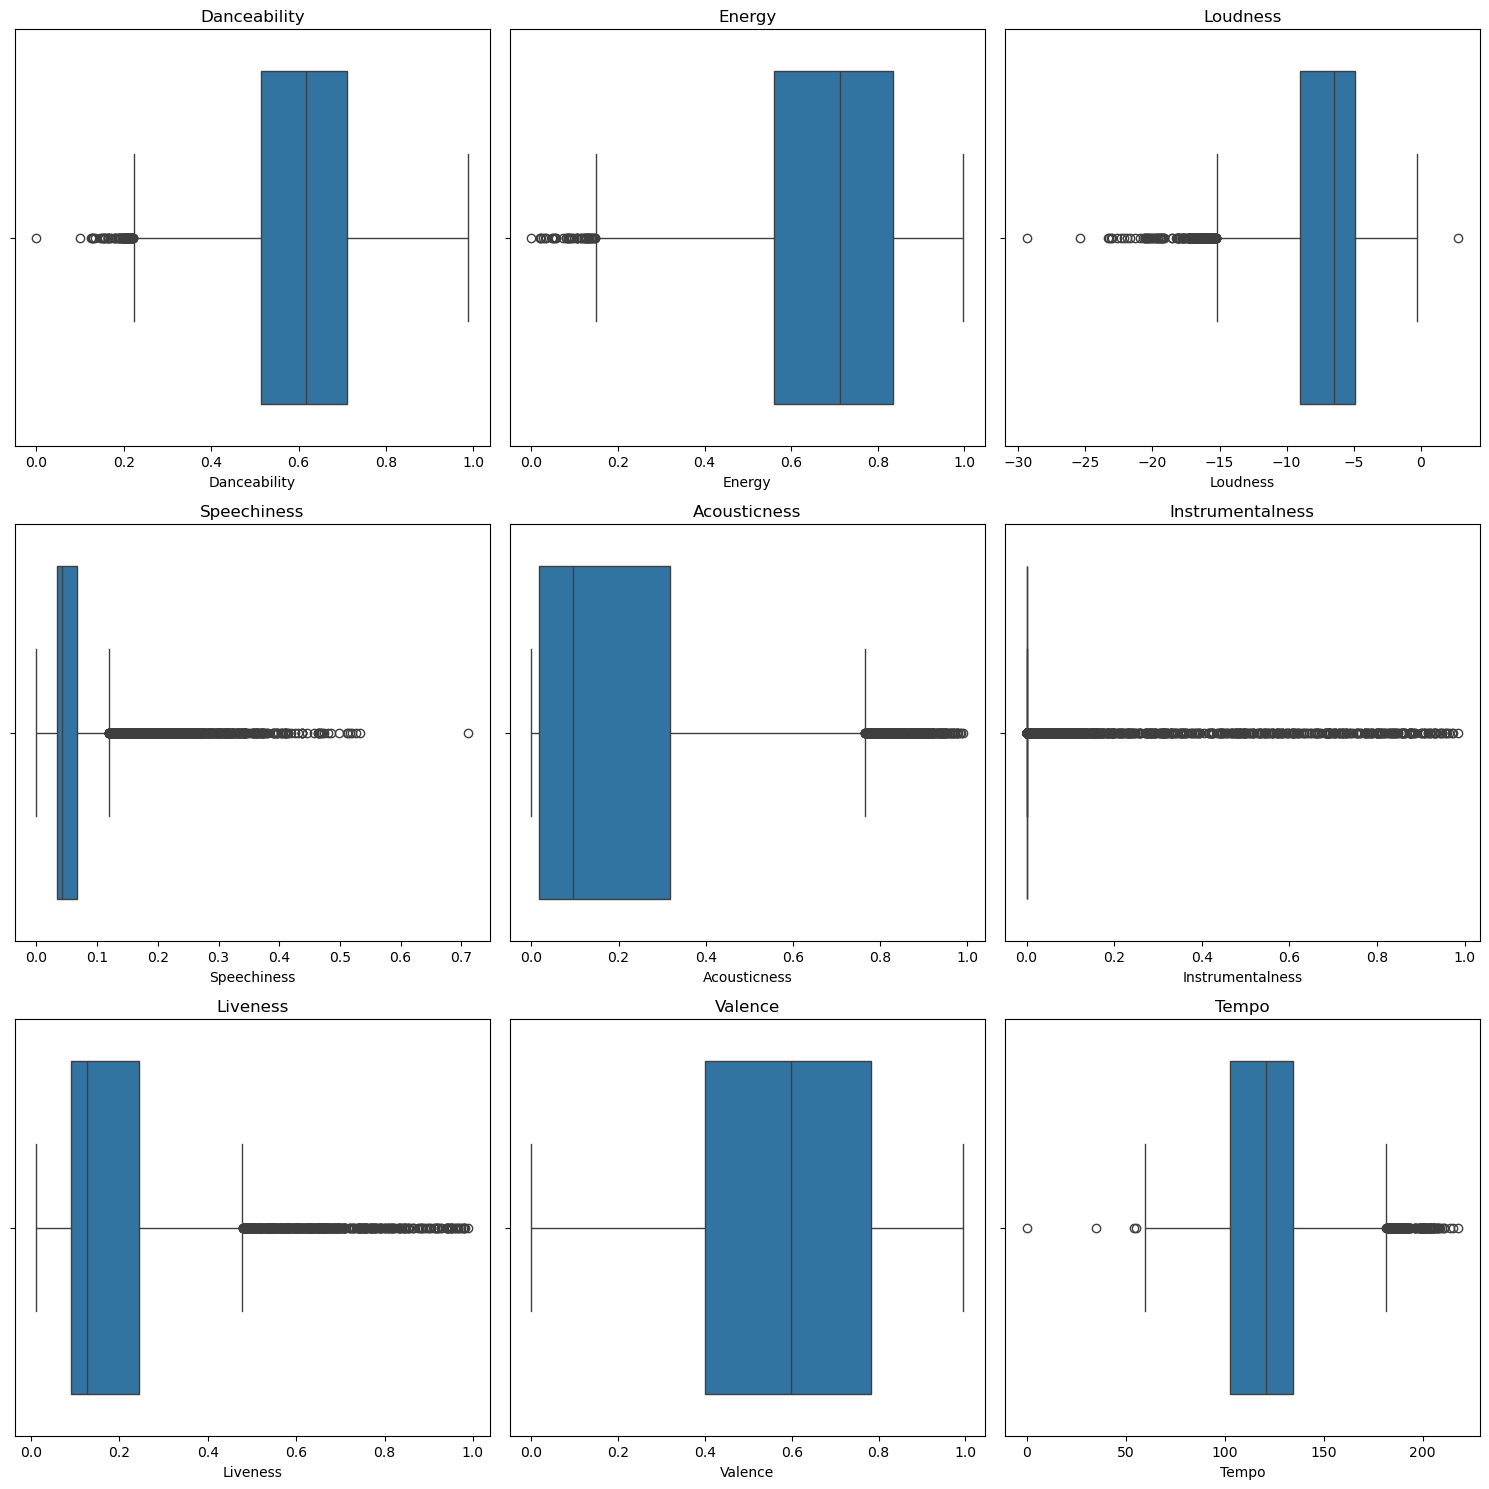

In [530]:
# Select relevant features
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 
            'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

# Drop rows with missing values in selected features
df_cluster = df[features].dropna()

# Plot boxplots for each feature
import math
n_cols = df_cluster.shape[1]
n_rows = math.ceil(n_cols / 3)

plt.figure(figsize=(15, n_rows * 5))
for i, col in enumerate(df_cluster.columns):
    plt.subplot(n_rows, 3, i + 1)
    sns.boxplot(x=df_cluster[col])
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

### Feature Engineering
#### DBSCAN is sensitive to scale differences, we should standardize numerical features

In [532]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

X_scaled

array([[-0.52380154,  0.39758633,  0.03939864, ..., -0.74219372,
        -1.7925811 ,  0.51251408],
       [ 0.64974787, -1.0780586 , -0.24703221, ..., -0.48726163,
         0.61838651, -0.15127554],
       [ 0.38209625,  0.15687829,  0.1852069 , ..., -0.68082118,
         0.51792953, -0.74572028],
       ...,
       [-0.0434012 ,  1.10924488, -0.13721846, ...,  1.07065666,
        -0.54105451, -0.05772284],
       [-0.19438416, -0.94200623, -1.49829884, ..., -0.66193732,
         1.16671422,  1.72679316],
       [-0.02967547, -0.46059015, -0.84460201, ..., -0.85684571,
        -1.04333943,  0.22956861]])

### Begin Modeling

#### A general rule of thumb for min_samples = 2 * number of features; Since we have 9 features, we initially set `min_samples` = 2*9 = 18
#### Let's use K-Distance Plot to find optimal `eps`

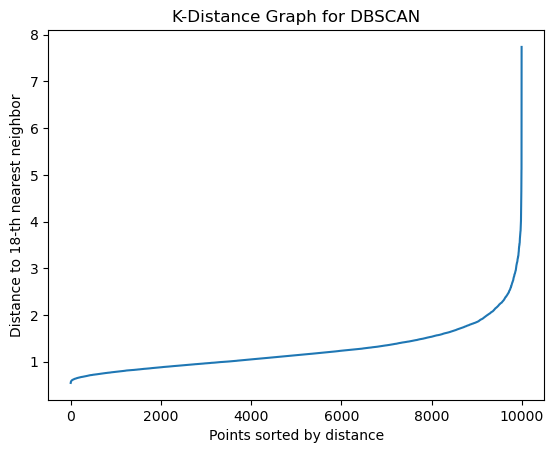

In [590]:
# Compute k-nearest neighbors (k = min_samples)
k = 18
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Sort and plot distances
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"Distance to {k}-th nearest neighbor")
plt.title("K-Distance Graph for DBSCAN")
plt.show()

> In K-Distance graph, the elbow seems to be around eps ≈ 2; We will set eps = 2.0 and run DBSCAN

In [596]:
# Initialize DBSCAN with eps=2, min_samples=18
dbscan = DBSCAN(eps=2, min_samples=18)

# Fit the model
df['cluster'] = dbscan.fit_predict(X_scaled)

In [598]:
df['cluster']

0       0
1       0
2       0
3       0
4       0
       ..
9988    0
9989    0
9990    0
9991    0
9992    0
Name: cluster, Length: 9993, dtype: int64

#### Check how many clusters were formed and visualize the distribution

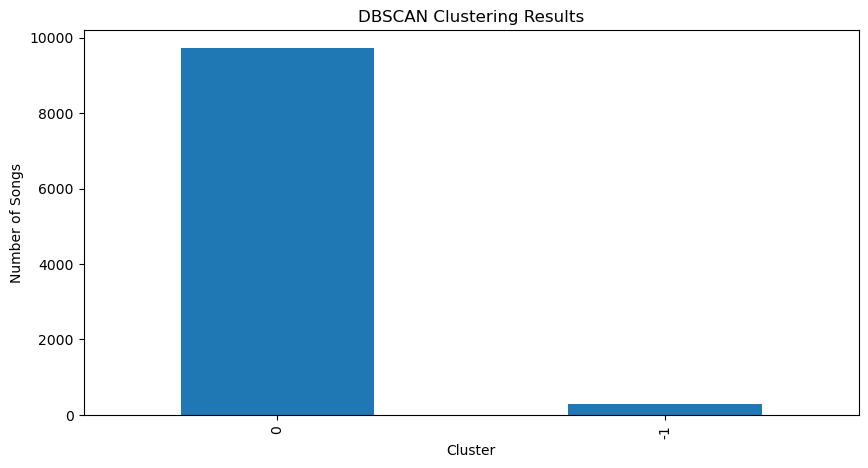

In [601]:
# Count number of songs in each cluster
cluster_counts = df['cluster'].value_counts()

# Plot the number of songs per cluster
plt.figure(figsize=(10,5))
cluster_counts.plot(kind='bar')
plt.xlabel("Cluster")
plt.ylabel("Number of Songs")
plt.title("DBSCAN Clustering Results")
plt.show()

In [608]:
cluster_counts

cluster
 0    9715
-1     278
Name: count, dtype: int64

> Almost all songs belong to a single cluster (Cluster 0)

> A small number of noise points (-1)

#### Therefore, we need to reduce min_samples to 9 (take half) since 18 might be too large to form more clusters

### Hyperparameter Tuning (Change eps & min_samples)

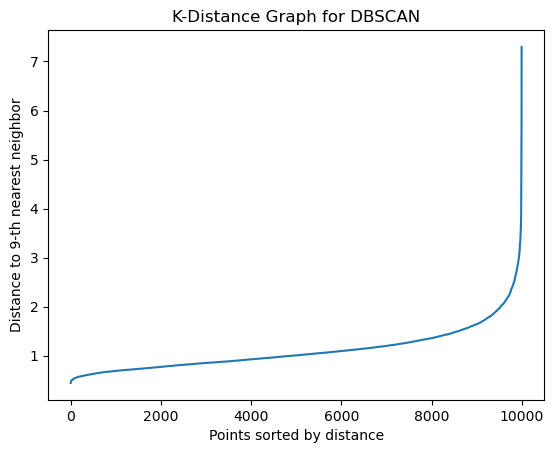

In [611]:
# Compute k-nearest neighbors (k = min_samples)
k = 9
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Sort and plot distances
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"Distance to {k}-th nearest neighbor")
plt.title("K-Distance Graph for DBSCAN")
plt.show()

> It looks like we have optimal eps=2 when min_samples=9

In [614]:
# Apply eps=2, min_samples=9 to DBSCAN
dbscan = DBSCAN(eps=2, min_samples=9)

# Fit the model
df['cluster'] = dbscan.fit_predict(X_scaled)

In [616]:
df['cluster']

0       0
1       0
2       0
3       0
4       0
       ..
9988    0
9989    0
9990    0
9991    0
9992    0
Name: cluster, Length: 9993, dtype: int64

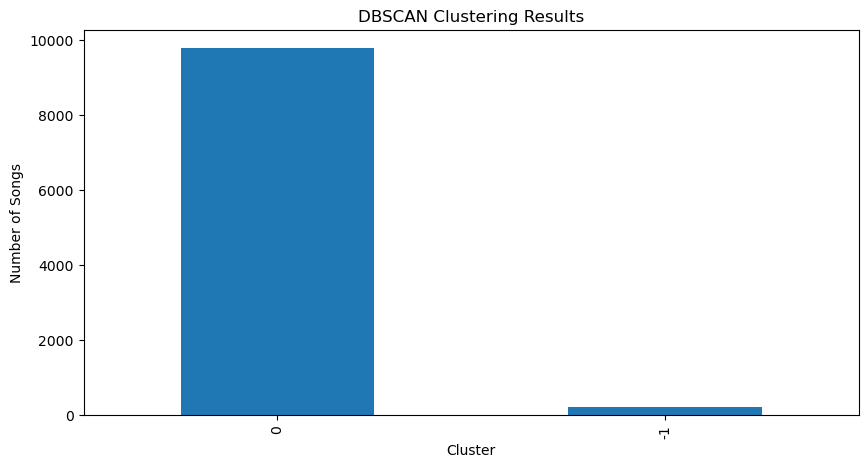

In [618]:
# Count number of songs in each cluster
cluster_counts = df['cluster'].value_counts()

# Plot the number of songs per cluster
plt.figure(figsize=(10,5))
cluster_counts.plot(kind='bar')
plt.xlabel("Cluster")
plt.ylabel("Number of Songs")
plt.title("DBSCAN Clustering Results")
plt.show()

In [620]:
cluster_counts

cluster
 0    9784
-1     209
Name: count, dtype: int64

#### DBSCAN still doesn't produce more clusters with min_samples = 9, let's try reducing eps to 1.5

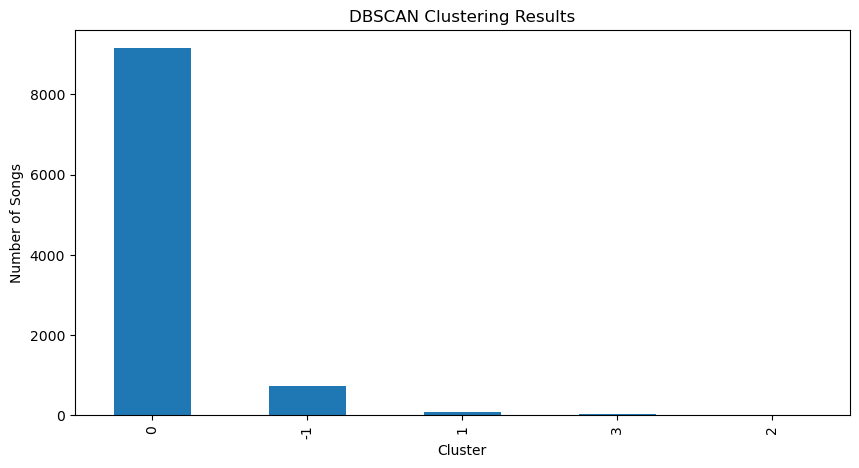

In [649]:
# Apply eps=1.5, min_samples=9 to DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=9)

# Fit the model
df['cluster'] = dbscan.fit_predict(X_scaled)

# Count number of songs in each cluster
cluster_counts = df['cluster'].value_counts()

# Plot the number of songs per cluster
plt.figure(figsize=(10,5))
cluster_counts.plot(kind='bar')
plt.xlabel("Cluster")
plt.ylabel("Number of Songs")
plt.title("DBSCAN Clustering Results")
plt.show()

In [651]:
cluster_counts

cluster
 0    9150
-1     731
 1      85
 3      18
 2       9
Name: count, dtype: int64

> One large cluster (Cluster 0) with 9,150 songs

> A moderate number of noise points (-1 = 731 songs)

> Three very small clusters (Cluster 1, 2, 3) with only 85, 9, and 18 songs

#### Now we have 4 clusters (exclude noise cluster), can proceed with eps=1.5 and min_samples=9

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


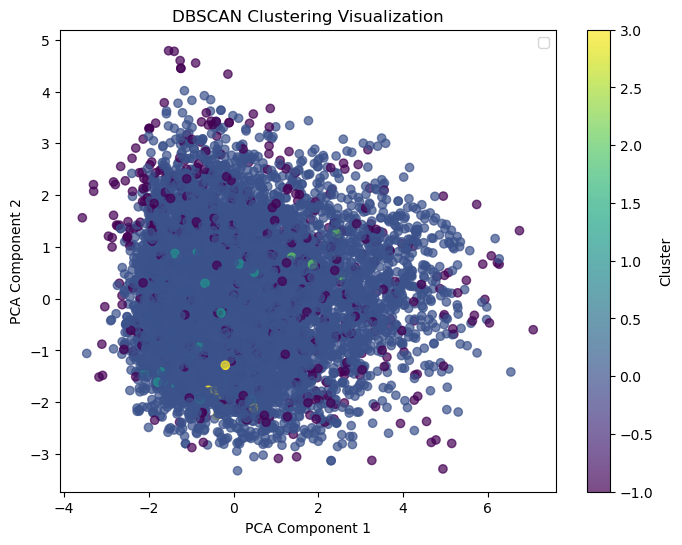

In [654]:
# Visualize the clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering Visualization")
plt.colorbar(label="Cluster")
plt.legend()
plt.show()

> From the plot, everything looks mixed together and there aren't clear clusters, which could be an issue

In [658]:
df.head()

,Unnamed: 0,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,...,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label,Copyrights,lyrics,cluster
0,0,spotify:track:0vNPJrUrBnMFdCs8b2MTNG,Fader,spotify:artist:4W48hZAnAHVOC2c8WH8pcq,The Temper Trap,spotify:album:0V59MMtgoruvEqMv18KAOH,Conditions (Tour Edition),spotify:artist:4W48hZAnAHVOC2c8WH8pcq,The Temper Trap,2009,...,0.000101,0.690000,0.0752,0.158,134.974,4.0,Liberation Records,"C 2010 Liberation Music, P 2010 Liberation Music","I'm in transit\n Floating, stranded on this bo...",1
1,1,spotify:track:0NpvdCO506uO58D4AbKzki,Sherry,spotify:artist:6mcrZQmgzFGRWf7C0SObou,Frankie Valli & The Four Seasons,spotify:album:0NUEQILaBzavnzcMEs4buZ,The Very Best of Frankie Valli & The 4 Seasons,spotify:artist:6mcrZQmgzFGRWf7C0SObou,Frankie Valli & The Four Seasons,2003-01-14,...,0.626000,0.000000,0.1130,0.734,117.562,4.0,Rhino,C © 2004 Bob Gaudio & Frankie Valli d/b/a The ...,"Sherry, Sherry baby\n Sherry, Sherry baby\n Sh...",0
2,2,spotify:track:1MtUq6Wp1eQ8PC6BbPCj8P,I Took A Pill In Ibiza - Seeb Remix,"spotify:artist:2KsP6tYLJlTBvSUxnwlVWa, spotify...","Mike Posner, Seeb",spotify:album:1Tz3Ai1guEFf4hV3d9i17K,"At Night, Alone.",spotify:artist:2KsP6tYLJlTBvSUxnwlVWa,Mike Posner,2016-05-06,...,0.035300,0.000008,0.0843,0.710,101.969,4.0,"Monster Mountain, LLC / Island","C © 2016 Island Records, a division of UMG Rec...",NaN,0
3,3,spotify:track:59lq75uFIqzUZcgZ4CbqFG,Let Go for Tonight,spotify:artist:7qRll6DYV06u2VuRPAVqug,Foxes,spotify:album:5AQ7uKRSpAv7SNUl4j24ru,Glorious (Deluxe),spotify:artist:7qRll6DYV06u2VuRPAVqug,Foxes,2014-05-12,...,0.042900,0.000002,0.3260,0.299,140.064,4.0,Sign Of The Times Records,P (P) 2014 Sign Of The Times Limited under exc...,Fell from the sky\n We fell from the sky and s...,0
4,4,spotify:track:7KdcZQ3GJeGdserhK61kfv,The Way I Want To Touch You,spotify:artist:7BEfMxbaqx6dOpbtlEqScm,Captain & Tennille,spotify:album:3GUxesVyOehInaxJyCTh6d,Love Will Keep Us Together,spotify:artist:7BEfMxbaqx6dOpbtlEqScm,Captain & Tennille,1975-01-01,...,0.624000,0.000112,0.3430,0.597,111.290,4.0,A&M,"C © 1975 A&M Records, P This Compilation ℗ 197...","I never wanted, I never wanted to touch a man\...",0


#### Compare the mean of each cluster's features to see which group is

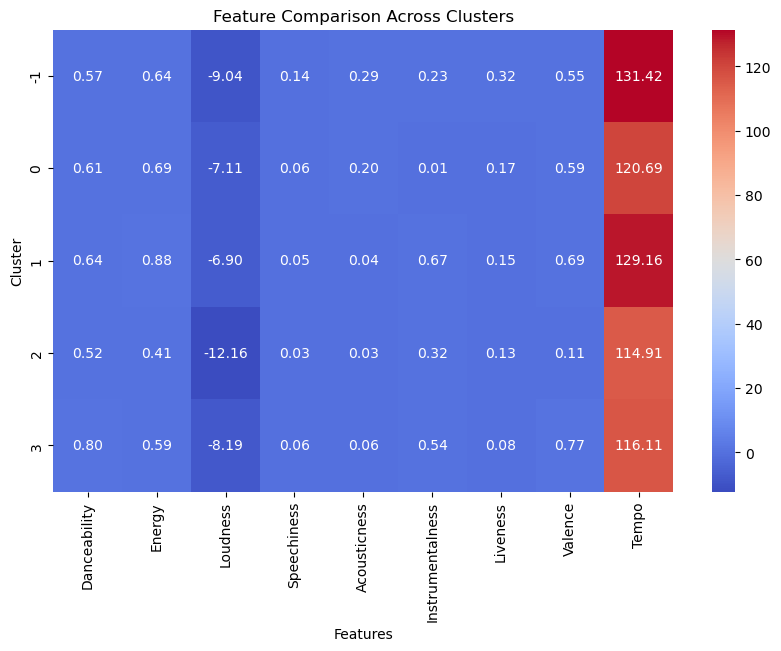

In [660]:
# Calculate average feature values per cluster
cluster_summary = df.groupby('cluster')[features].mean()

# Set up the figure for a heatmap comparison (just to visualize cluster_summary, not a correlation matrix)
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Comparison Across Clusters")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()

> Since all clusters have similar averages, the dataset might not have strong natural clusters and no real separation

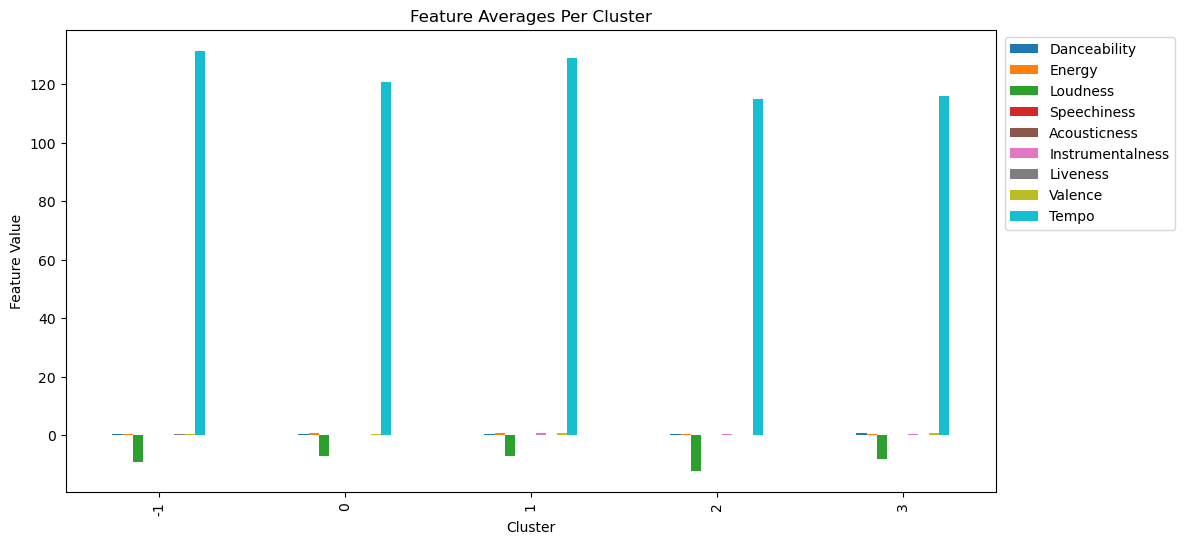

In [662]:
# Bar chart comparing feature averages across clusters
cluster_summary.plot(kind='bar', figsize=(12, 6), colormap="tab10")
plt.title("Feature Averages Per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Feature Value")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()

In [665]:
# Identify key characteristics for each cluster
cluster_analysis_max = cluster_summary.copy()
cluster_analysis_max['Most Danceable'] = cluster_summary['Danceability'].idxmax()
cluster_analysis_max['Most Energetic'] = cluster_summary['Energy'].idxmax()
cluster_analysis_max['Loudest'] = cluster_summary['Loudness'].idxmax()
cluster_analysis_max['Most Speech-like'] = cluster_summary['Speechiness'].idxmax()
cluster_analysis_max['Most Acoustic'] = cluster_summary['Acousticness'].idxmax()
cluster_analysis_max['Most Instrumental'] = cluster_summary['Instrumentalness'].idxmax()
cluster_analysis_max['Most Live'] = cluster_summary['Liveness'].idxmax()
cluster_analysis_max['Happiest (High Valence)'] = cluster_summary['Valence'].idxmax()
cluster_analysis_max['Fastest Tempo'] = cluster_summary['Tempo'].idxmax()

# Drop the first 9 columns by index position
cluster_analysis_max.drop(cluster_analysis_max.columns[:9], axis=1, inplace=True)

# Display the cluster characteristics
display(cluster_analysis_max)

,Most Danceable,Most Energetic,Loudest,Most Speech-like,Most Acoustic,Most Instrumental,Most Live,Happiest (High Valence),Fastest Tempo
cluster,,,,,,,,,
-1,3,1,1,-1,-1,1,-1,3,-1
0,3,1,1,-1,-1,1,-1,3,-1
1,3,1,1,-1,-1,1,-1,3,-1
2,3,1,1,-1,-1,1,-1,3,-1
3,3,1,1,-1,-1,1,-1,3,-1


In [667]:
# Identify key characteristics for each cluster
cluster_analysis_min = cluster_summary.copy()
cluster_analysis_min['Least Danceable'] = cluster_summary['Danceability'].idxmin()
cluster_analysis_min['Least Energetic'] = cluster_summary['Energy'].idxmin()
cluster_analysis_min['Quietest'] = cluster_summary['Loudness'].idxmin()
cluster_analysis_min['Least Speech-like'] = cluster_summary['Speechiness'].idxmin()
cluster_analysis_min['Most Electric'] = cluster_summary['Acousticness'].idxmin()
cluster_analysis_min['Most Vocal'] = cluster_summary['Instrumentalness'].idxmin()
cluster_analysis_min['Most Studio'] = cluster_summary['Liveness'].idxmin()
cluster_analysis_min['Saddest (Low Valence)'] = cluster_summary['Valence'].idxmin()
cluster_analysis_min['Slowest Tempo'] = cluster_summary['Tempo'].idxmin()

# Drop the first 9 columns by index position
cluster_analysis_min.drop(cluster_analysis_min.columns[:9], axis=1, inplace=True)

# Display the cluster characteristics
display(cluster_analysis_min)

,Least Danceable,Least Energetic,Quietest,Least Speech-like,Most Electric,Most Vocal,Most Studio,Saddest (Low Valence),Slowest Tempo
cluster,,,,,,,,,
-1,2,2,2,2,2,0,3,2,2
0,2,2,2,2,2,0,3,2,2
1,2,2,2,2,2,0,3,2,2
2,2,2,2,2,2,0,3,2,2
3,2,2,2,2,2,0,3,2,2


In [669]:
cluster_labels = cluster_summary.copy()

# Dictionary for cluster labels
labels_dict = {
    0: "Vocal",
    1: "Energetic & Loud & Instrumental",
    2: "Quiet & Electric & Sad & Slow",
    3: "Danceable & Happy & Studio"
}

cluster_labels["Track Characteristics"] = cluster_labels.index.map(labels_dict)

# Drop the first 9 columns by index position
cluster_labels.drop(cluster_labels.columns[:9], axis=1, inplace=True)

# Display the cluster labels
display(cluster_labels)

,Track Characteristics
cluster,
-1,NaN
0,Vocal
1,Energetic & Loud & Instrumental
2,Quiet & Electric & Sad & Slow
3,Danceable & Happy & Studio


In [691]:
# Map track characteristics to each track
df_dbscan = df.merge(
    cluster_labels,
    on='cluster',
    how='left'
)

# Reorder columns
df_dbscan = df_dbscan[[
        'Track Name',
        'Track URI',
        'Artist Name(s)',
        'Artist Genres',
        'Album Name',
        'Album Release Date',
        'Popularity',
        'cluster',
        'Track Characteristics'
]]
   
# Final dataset with track, artist, album, popularity, cluster, characteristics
df_dbscan

,Track Name,Track URI,Artist Name(s),Artist Genres,Album Name,Album Release Date,Popularity,cluster,Track Characteristics
0,Fader,spotify:track:0vNPJrUrBnMFdCs8b2MTNG,The Temper Trap,"indietronica,modern rock,shimmer pop",Conditions (Tour Edition),2009,0,1,Energetic & Loud & Instrumental
1,Sherry,spotify:track:0NpvdCO506uO58D4AbKzki,Frankie Valli & The Four Seasons,"adult standards,bubblegum pop,doo-wop,lounge,n...",The Very Best of Frankie Valli & The 4 Seasons,2003-01-14,54,0,Vocal
2,I Took A Pill In Ibiza - Seeb Remix,spotify:track:1MtUq6Wp1eQ8PC6BbPCj8P,"Mike Posner, Seeb","dance pop,pop,pop dance,pop rap,pop dance","At Night, Alone.",2016-05-06,63,0,Vocal
3,Let Go for Tonight,spotify:track:59lq75uFIqzUZcgZ4CbqFG,Foxes,"electropop,metropopolis,uk pop",Glorious (Deluxe),2014-05-12,39,0,Vocal
4,The Way I Want To Touch You,spotify:track:7KdcZQ3GJeGdserhK61kfv,Captain & Tennille,"mellow gold,soft rock,yacht rock",Love Will Keep Us Together,1975-01-01,35,0,Vocal
...,...,...,...,...,...,...,...,...,...
9988,Da Ya Think I'm Sexy?,spotify:track:0gTFo2Va6oImBxUZOEOg9T,"N-Trance, Rod Stewart","eurodance,hip house,mellow gold,soft rock",Da Ya Think I'm Sexy?,1997-10-27,0,0,Vocal
9989,Sugar,spotify:track:1GLM0M9DA62xZsyp2UNq7i,"Peking Duk, Jack River","aussietronica,australian electropop,australian...",Sugar,2019-01-17,41,0,Vocal
9990,Jackson’s Last Stand - Radio Edit,spotify:track:1AMEicdMJudkwm5IgNTx9R,Ou Est Le Swimming Pool,"australian dance,neo-synthpop",Jackson’s Last Stand,2010-01-01,20,0,Vocal
9991,Sick N Tired,spotify:track:5ubGyprsZq8GQriurAF1dW,Billy Thorpe & The Aztecs,australian rock,The Very Best Of,2007-02-06,17,0,Vocal


In [695]:
# df_dbscan.to_csv('C:/Users/97610/Downloads/dbscan_4_clusters.csv')

### Model Evaluation

In [705]:
# Remove noise points (-1) since Silhouette Score does not support them
valid_clusters = df[df['cluster'] != -1]['cluster']
valid_points = X_scaled[df['cluster'] != -1]

# Calculate silhouette score
score = silhouette_score(valid_points, valid_clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.2312647729278768


#### Silhouette Score - Cluster Quality
> The score is close to 0.2, meaning cluster are not well-separated

In [712]:
# Calculate Davies-Bouldin Index
dbi = davies_bouldin_score(valid_points, valid_clusters)
print("Davies-Bouldin Index:", dbi)

Davies-Bouldin Index: 1.075213978749226


#### Davies-Bouldin Index - Cluster Separation
> The index is close to 1.5, meaning poor separation

### **K-Means Clustering Results VS DBSCAN Clustering Results**

| Cluster | **K-means**                                   | **DBSCAN**                                        |
|---------|-----------------------------------------------|---------------------------------------------------|
| 0       | Danceable & Vocal <br> **Count:** 4251        | Vocal <br> **Count:** 9150                        |
| 1       | Energetic & Electric <br> **Count:** 3256     | Energetic & Loud & Instrumental <br> **Count:** 85|
| 2       | Acoustic & Quiet <br> **Count:** 2169         | Quiet & Electric & Sad & Slow <br> **Count:** 9   |
| 3       | Instrumental & Pure Music <br> **Count:** 317 | Danceable & Happy & Studio <br> **Count:** 18     |
| -1      | (N/A)                                         | Noise / Outliers <br> **Count:** 731             |


#### From the comparison above, we can see clustering labels between two algorithms are pretty similar, but K-means has more balanced cluster sizes than DBSCAN. Therefore, DBSCAN clustering is not recommended for this business problem and dataset

### (3) OPTICS Clustering

#### Since OPTICS (Ordering Points To Identify the Clustering Structure) is also a density-based clustering algorithm similar to DBSCAN clustering, and this dataset is not suitable for density-based clustering algorithm, we will skip this part

### (3) Hierarchical Clustering

In [ ]:
REMEMBER TO DO A MODEL EVALUATION, THEN COMPARE WITH ALL

### (4) Word2Vec

Summary? Or (5) GMM or (5) Autoencoders or (5) search other algorithms

## Problem Statement 2: Cluster songs into different categories based on lyrics sentiment (See "EDA Insights and Next Steps")
#### (``)

### Feature Engineering

In [ ]:
Some date-related fields are stored as strings (e.g., "Album Release Date", "Added At"), which might need conversion.

In [ ]:
White Paper Report (no requirement for pages): - DUE SUNDAY

Business Problem - from Proposal

Data Source-Quality - from Proposal

EDA (explanatory data analysis) - Hunter
tsne,clustering wanna see general insights among features (put Clustering into this part)

Popularity Prediction: - Doris and Monica
- Feature Engineering 
normalization, dimension reduction, enhancement (kde)
- Model Engineering 
loss function, different models different parameters etc
- Model interpretation/validation
Which features/components were important for model prediction. Did you check sanity (overfit,underfit,imbalance data problem)

Recommendation System: - Pang & Andrew
- Feature Engineering 
normalization, dimension reduction, enhancement (kde)
- Model Engineering 
loss function, different models different parameters etc
- Model interpretation/validation
Which features/components were important for model prediction. Did you check sanity (overfit,underfit,imbalance data problem)

Business Value/contribution - from Proposal







Presentation Slides (extract info from report - max 10 pages):

Hunter: (3 pages)
Cover
Business problem
EDA

Monica and Doris: (3 pages)
Feature Engineering
Model Engineering
Model interpretation/validation

Pang and Andrew: (3 pages)
Feature Engineering
Model Engineering 
Model interpretation/validation
    
Business Value/contribution (1 page) - Hunter

Appendix:
Data Source-Quality



Next Team Meeting - 3/9 SUNDAY 9:30AM (Zoom)
Team Presentation Practice - 3/10 MONDAY 3PM (In-Person)






Create Google Drive - team emails
Dataset after clustering: Track name, Track URL, Artist Name, Cluster Number, Cluster Label